# Modeling Student Performance: Using Multiple Linear Regression to Predict Exam Scores

Our selected dataset is [Student Performance Factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors).

All of the scripts and data for this project can be found on our [Git Repository](https://github.com/cztm/linear-regression).

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from matplotlib import gridspec

from formatting.plot_settings import colors

import pandas as pd
import numpy as np

import itertools
from itertools import combinations

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import OLSInfluence

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%config InlineBackend.figure_format = 'retina'

## Student Performance Factors Dataset Overview

The "Student Performance Factors" dataset contains 19 variables that may influence students' exam scores. It is designed to help researchers analyze the potential impact of these factors on student performance. The dataset includes information such as study time (`Hours_Studied`), attendance (`Attendance`), parental involvement (`Parental_Involvement`), access to resources (`Access_to_Resources`), and participation in extracurricular activities (`Extracurricular_Activities`). Additionally, it covers socioeconomic and background data such as family income (`Family_Income`), motivation level (`Motivation_Level`), tutoring sessions (`Tutoring_Sessions`), school type (`School_Type`), sleep hours (`Sleep_Hours`), and parental education level (`Parental_Education_Level`).

### Purpose and Applications

Researchers can use this dataset to build regression models for predicting exam scores (`Exam_Score`) and to identify significant factors affecting student academic performance. The dataset's potential applications include:

- Supporting educational decision-making
- Assisting in policy formulation
- Optimizing the allocation of educational resources

Ultimately, the goal is to better understand and improve the key factors influencing student success, thereby enabling educators and policymakers to provide more targeted support.

### Variable Descriptions

1. **Hours_Studied**: Daily study hours.  
2. **Attendance**: Attendance rate (percentage).  
3. **Parental_Involvement**: Parent involvement (Low, Medium, High).  
4. **Access_to_Resources**: Resource accessibility (Low, Medium, High).  
5. **Extracurricular_Activities**: Participation in extracurricular activities.  
6. **Sleep_Hours**: Daily sleep hours.  
7. **Previous_Scores**: Prior exam scores.  
8. **Motivation_Level**: Motivation level (Low, Medium, High).  
9. **Internet_Access**: Internet access.  
10. **Tutoring_Sessions**: Number of tutoring sessions.  
11. **Family_Income**: Family income level (Low, Medium, High).  
12. **Teacher_Quality**: Teacher quality (Low, Medium, High).  
13. **School_Type**: School type (Public or Private).  
14. **Peer_Influence**: Peer influence (Positive, Neutral, Negative).  
15. **Physical_Activity**: Weekly physical activity hours.  
16. **Learning_Disabilities**: Presence of learning disabilities.  
17. **Parental_Education_Level**: Parents' education level (High School, College, Postgraduate).  
18. **Distance_from_Home**: Distance from home to school (Near, Moderate, Far).  
19. **Gender**: Student gender (Male or Female).  
20. **Exam_Score**: Academic performance indicator (exam score).

### Research Questions

1. **Which factors are the most significant predictors of students' exam scores?**
2. **How do parental involvement, access to resources, and socioeconomic factors impact student performance?**
3. **What is the combined effect of study habits, peer influence, and tutoring sessions on exam outcomes?**
4. **Does school type or teacher quality significantly influence exam scores?**

### Methods Used in the Analysis
   
1. **Exploratory Data Analysis**: Initial analysis includes correlation calculations to understand the relationships between predictors and exam scores.

2. **Multiple Linear Regression**: Regression models are built using significant predictors such as attendance, hours studied, and previous scores. The model is validated using metrics like adjusted R-squared, p-values, and F-statistics.

3. **ANOVA (Types I, II, and III)**: Variance analysis is conducted to understand the contribution of each predictor to the total variance in exam scores.

4. **Model Evaluation**: The model’s prediction capability is visualized through plots of actual vs. predicted exam scores, residuals distribution, and summary statistics.


In [2]:
students = pd.read_csv("data/StudentPerformanceFactors.csv")

## EDA

### First sniff of the data

In [3]:
print(f"Our dataset has {students.shape[1]} variables and {students.shape[0]} records")

Our dataset has 20 variables and 6607 records


In [4]:
students.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [5]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Variable types

In [6]:
object_cols = []
numeric_cols = []
for colname in students.columns:
    type = students[colname].dtype
    if type == "int64":
        numeric_cols.append(colname)
    elif type == "object":
        object_cols.append(colname)

In [7]:
print(f"Object columns: {object_cols}")
print(f"Numeric columns: {numeric_cols}")

Object columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numeric columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


In [8]:
unique_values = students.nunique()
unique_values

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

Let's check that all of our object variables can be turned into categorical:

In [9]:
students[object_cols].nunique()

Parental_Involvement          3
Access_to_Resources           3
Extracurricular_Activities    2
Motivation_Level              3
Internet_Access               2
Family_Income                 3
Teacher_Quality               3
School_Type                   2
Peer_Influence                3
Learning_Disabilities         2
Parental_Education_Level      3
Distance_from_Home            3
Gender                        2
dtype: int64

Since all of them are not actually continuous or discrete values with a lot of unique values, let's go ahead and turn them info categorical variables.

In [10]:
students[object_cols] = students[object_cols].astype('category')

Let's check our resulting column types and redefine our lists.

In [11]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [12]:
categorical_variables = []
numerical_variables = []
for colname in students.columns:
    type = students[colname].dtype
    if type == "int64":
        numerical_variables.append(colname)
    elif type == "category":
        categorical_variables.append(colname)

In [13]:
print(f"Categorical variables: {categorical_variables}")
print(f"Numerical variables: {numerical_variables}")

Categorical variables: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numerical variables: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


### Missing values
Let's take a closer look at the missing values in our dataset.

In [14]:
students.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Let's check the actual frequency of our missing values based on the total amount of records we have.

In [15]:
students.isnull().sum()/len(students)*100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

The percentage of missing values we have is very very low, and since we have a considerable number of records as it is, we've decided to **drop the records with missing data**

In [16]:
students_adjusted = students.dropna()
students_adjusted.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [17]:
print(f"The original dataset, students, has {students.shape[1]} variables and {students.shape[0]} records")
print(f"We had a total of {students.shape[0]-students_adjusted.shape[0]} records with missing data.")
print(f"Our resulting dataset, adjusted_students, has {students_adjusted.shape[1]} variables and {students_adjusted.shape[0]} records")

The original dataset, students, has 20 variables and 6607 records
We had a total of 229 records with missing data.
Our resulting dataset, adjusted_students, has 20 variables and 6378 records


### First visualizations

We want to visualize our variables, and therefore will use a number of different plots. We will approach numerical and categorical variables differently.

In [18]:
print(f"Categorical variables: {categorical_variables}")
print(f"Numerical variables: {numerical_variables}")

Categorical variables: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numerical variables: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


#### Categorical variables

##### Bar plots

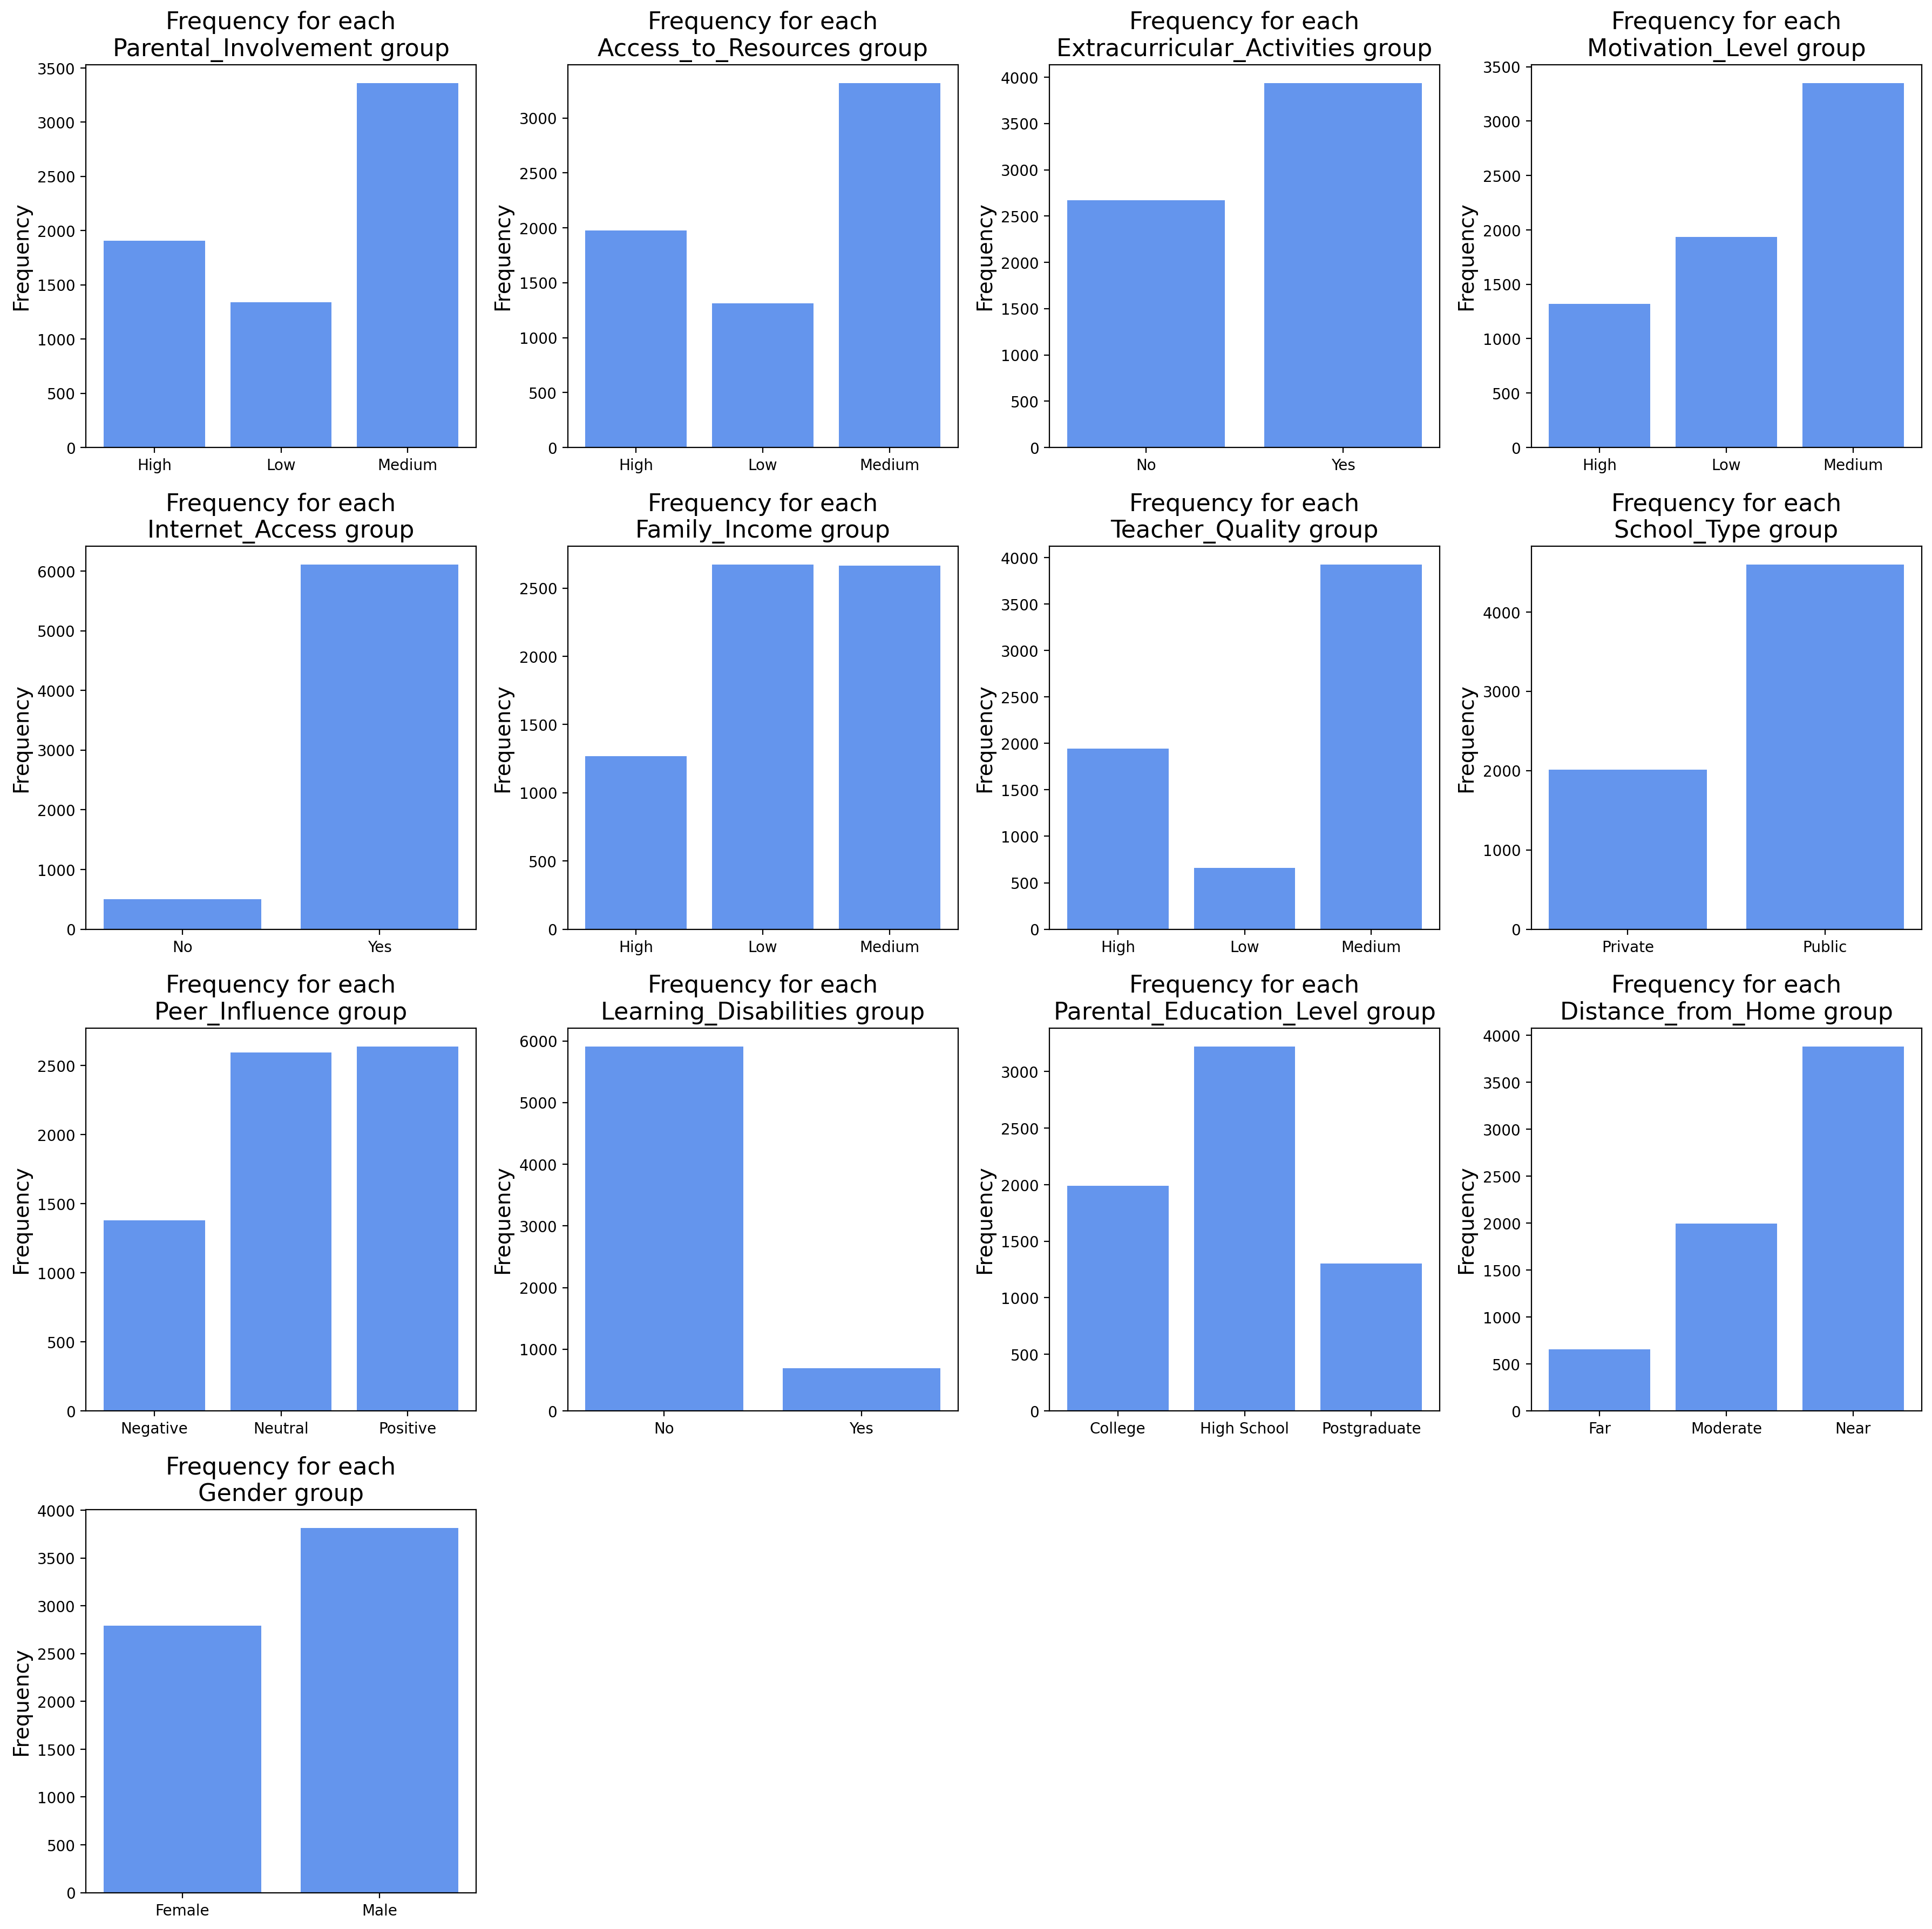

In [19]:
fig = plt.figure(figsize=(18, 18))
gs = gridspec.GridSpec(nrows=4, ncols=4)

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax02 = fig.add_subplot(gs[0, 2])
ax03 = fig.add_subplot(gs[0, 3])
ax10 = fig.add_subplot(gs[1, 0])
ax11 = fig.add_subplot(gs[1, 1])
ax12 = fig.add_subplot(gs[1, 2])
ax13 = fig.add_subplot(gs[1, 3])
ax20 = fig.add_subplot(gs[2, 0])
ax21 = fig.add_subplot(gs[2, 1])
ax22 = fig.add_subplot(gs[2, 2])
ax23 = fig.add_subplot(gs[2, 3])
ax30 = fig.add_subplot(gs[3, 0])

ax = [ax00, ax01, ax02, ax03, ax10, ax11, ax12, ax13, ax20, ax21, ax22, ax23, ax30]

for i, colname in enumerate(categorical_variables):

    group = students.groupby(colname, observed=False).size()

    ax[i].bar(group.index.astype(str), group, color=colors['blue'])

    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f"Frequency for each\n{colname} group")

plt.tight_layout()
plt.show()

##### Confusion tables

In [20]:
parent_invol_resource_access_crossed = pd.crosstab(students['Parental_Involvement'],students['Access_to_Resources'])
print(parent_invol_resource_access_crossed)

Access_to_Resources   High  Low  Medium
Parental_Involvement                   
High                   568  413     927
Low                    414  231     692
Medium                 993  669    1700


Since students who have medium/high parental involvement also have medium/high access to resources, both categories aren't necessary for the model and since access to resources matters more for our model, we'll be dropping parental involvement.

In [21]:
peer_influence_income_crossed = pd.crosstab(students['Peer_Influence'],students['Family_Income'])
print(peer_influence_income_crossed)

Family_Income   High   Low  Medium
Peer_Influence                    
Negative         251   577     549
Neutral          493  1038    1061
Positive         525  1057    1056


Since students who have medium/high family income also have neutral/positive peer relationships, both categories aren't necessary for the model and we've chosen to keep family income as it's a variable of interest.

In [22]:
distance_motivation_crossed = pd.crosstab(students['Distance_from_Home'], students['Motivation_Level'])
print(distance_motivation_crossed)

Motivation_Level    High   Low  Medium
Distance_from_Home                    
Far                  142   185     331
Moderate             394   611     993
Near                 773  1125    1986


Since students with medium/high motivation levels live moderate/near schools, both categories aren't necessary for the model and we've chosen to keep motivation levels as it's a variable of interest.

In [23]:
students = students_adjusted.drop(columns=['Distance_from_Home', 'Peer_Influence', 'Parental_Involvement'])

In [24]:
students.sample(5)

Hours_Studied  Attendance Access_to_Resources  \
1327             19          71                High   
5039             22          73              Medium   
1664             28          81              Medium   
2605             19          74                High   
685              24          90              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
1327                         No            5               96   
5039                         No            6               58   
1664                        Yes            8               73   
2605                         No            8               93   
685                         Yes            6               97   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
1327             High             Yes                  2           Low   
5039             High             Yes                  1        Medium   
1664              Low             Yes                  0        Medium   
2605             High             Yes                  1        Medium   
685               Low             Yes                  1          High   

     Teacher_Quality School_Type  Physical_Activity Learning_Disabilities  \
1327          Medium     Private                  0                   Yes   
5039          Medium     Private                  3                    No   
1664            High      Public                  3                    No   
2605          Medium      Public                  3                    No   
685             High      Public                  4                    No   

     Parental_Education_Level  Gender  Exam_Score  
1327                  College  Female          67  
5039             Postgraduate    Male          65  
1664             Postgraduate    Male          70  
2605              High School    Male          68  
685               High School    Male          72

#### Numerical variables

##### Boxplots

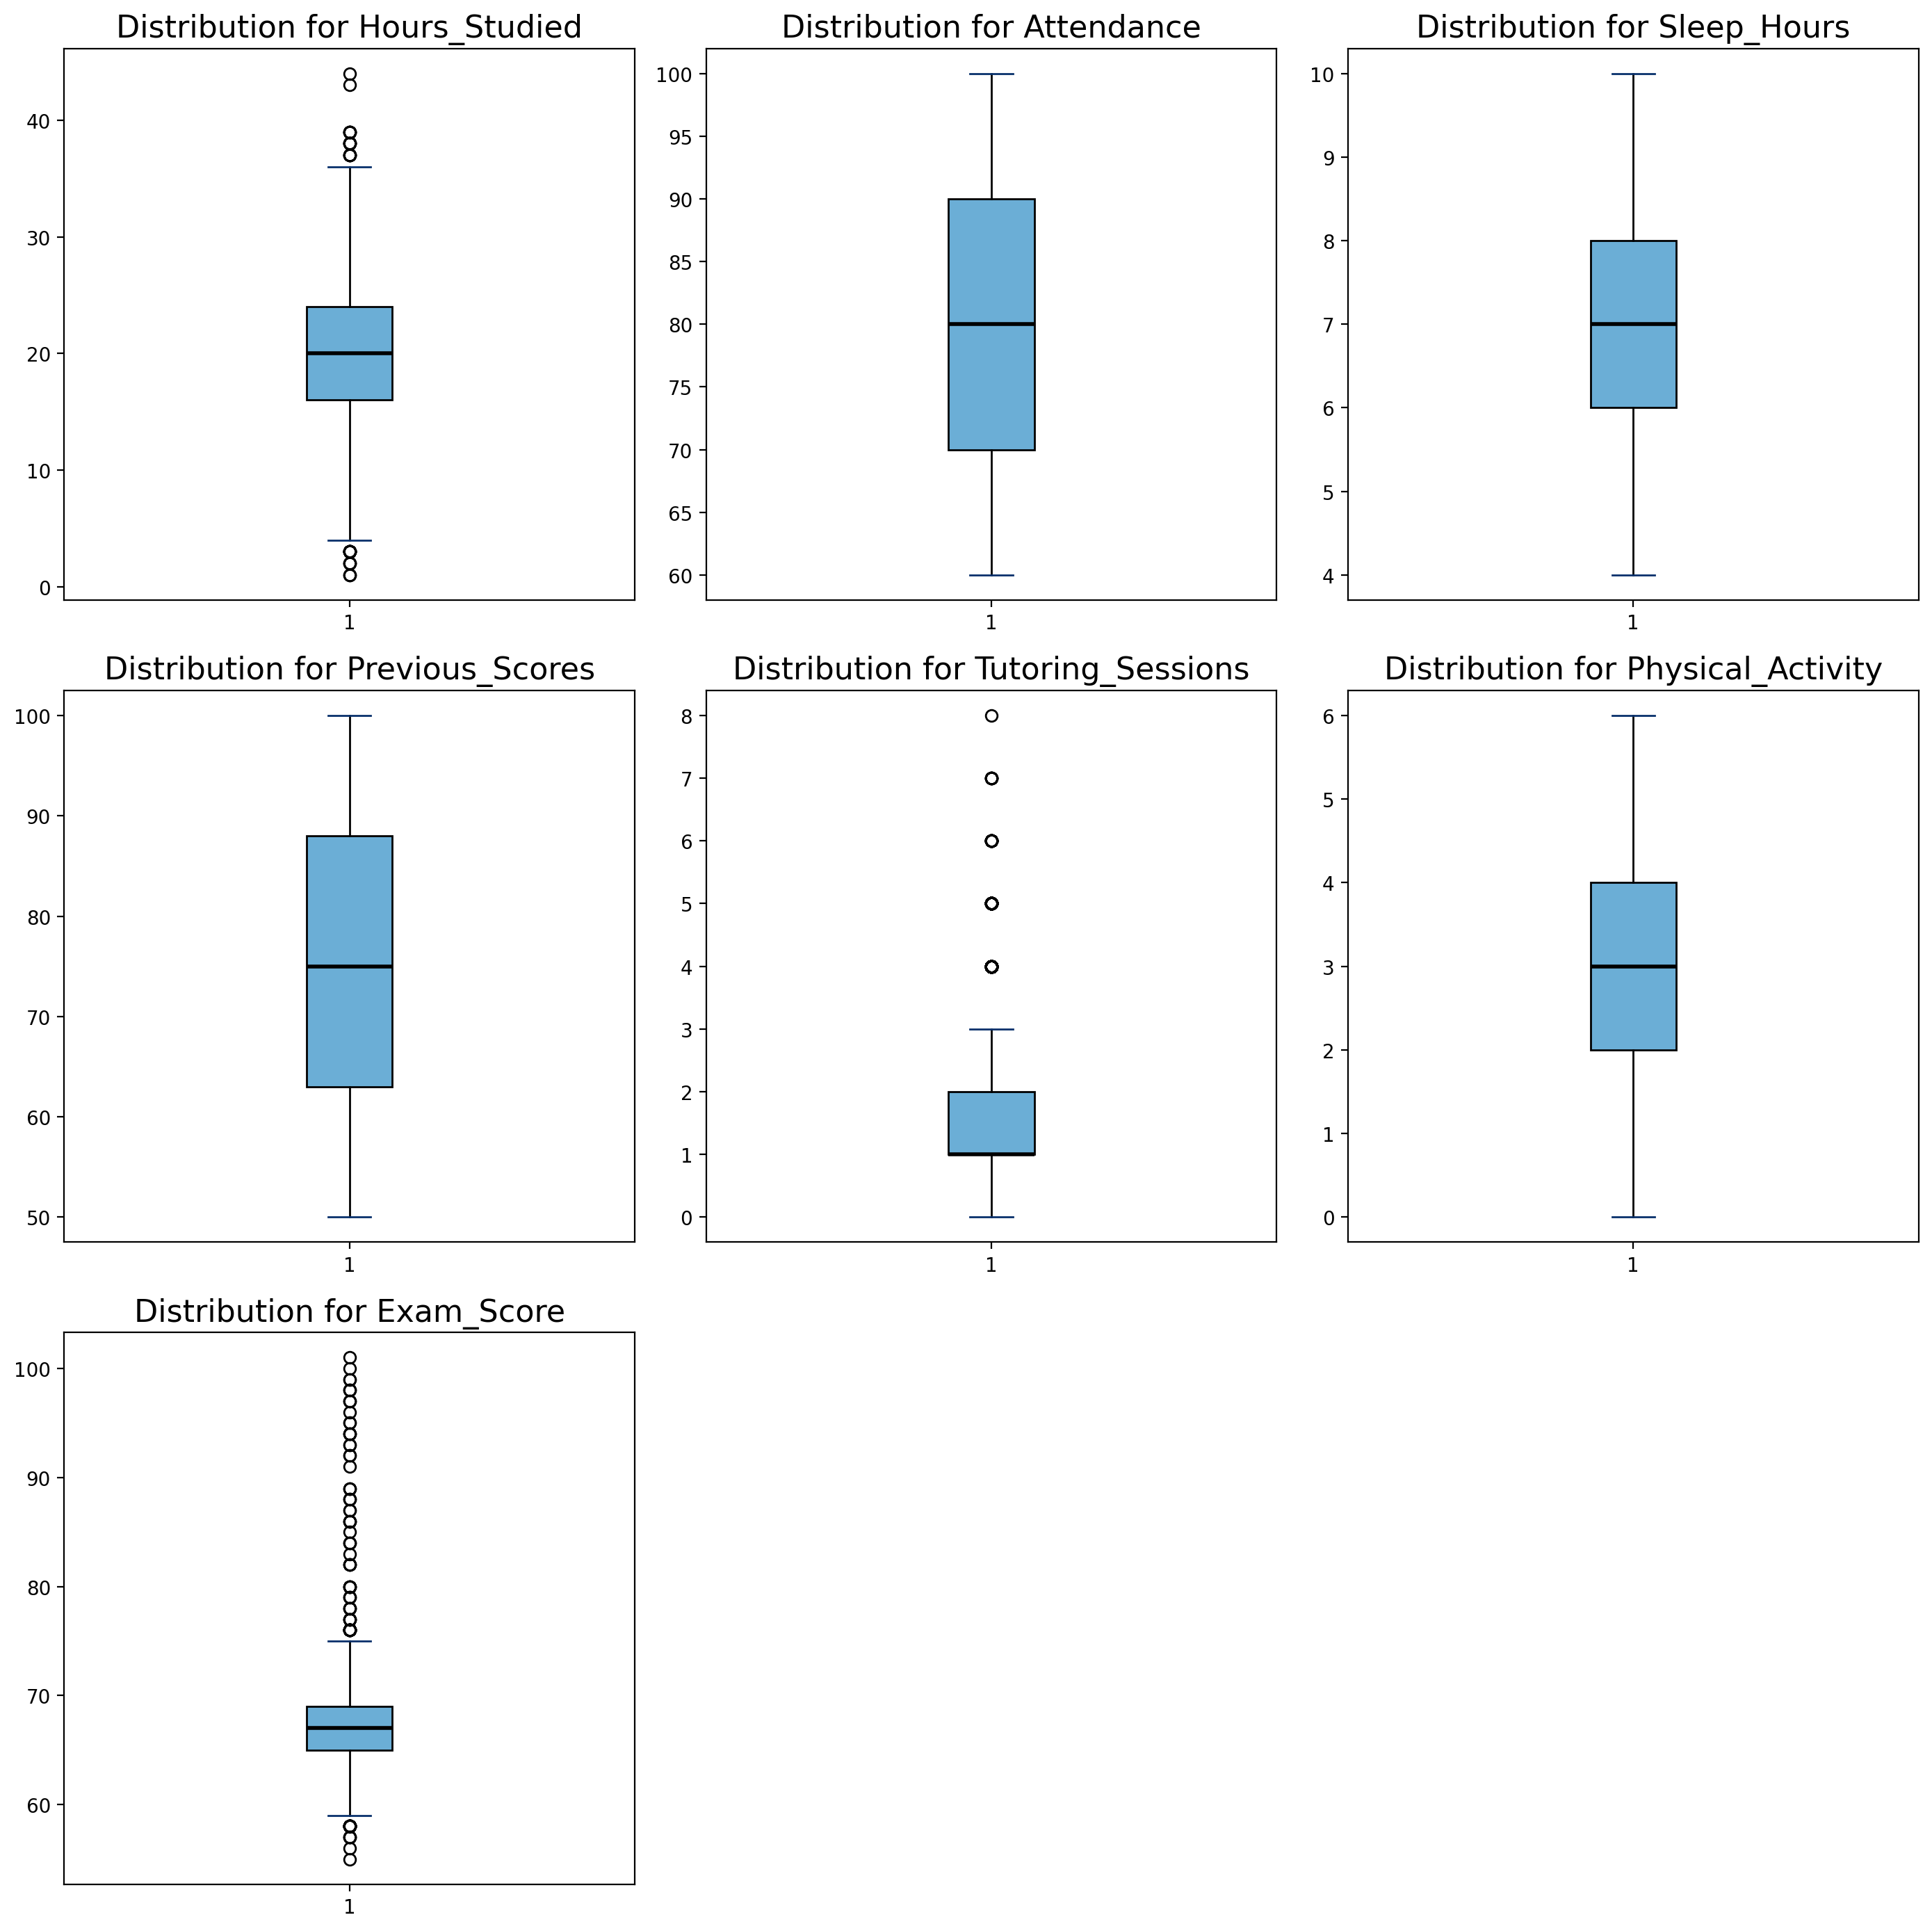

In [25]:
fig = plt.figure(figsize=(14, 14))
gs = gridspec.GridSpec(nrows=3, ncols=3)

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax02 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 0])
ax11 = fig.add_subplot(gs[1, 1])
ax12 = fig.add_subplot(gs[1, 2])
ax20 = fig.add_subplot(gs[2, 0])

ax = [ax00, ax01, ax02, ax10, ax11, ax12, ax20]

for i, colname in enumerate(numerical_variables):

    ax[i].boxplot(students_adjusted[colname], 
                  patch_artist=True,
                   boxprops=dict(facecolor=colors['custom_blues'][0]),
                  capprops=dict(color=colors['custom_blues'][4]),
                  medianprops=dict(color='black', linewidth=2))
    
    ax[i].set_title(f"Distribution for {colname}")

plt.tight_layout()
plt.show()

##### Pairwise plot

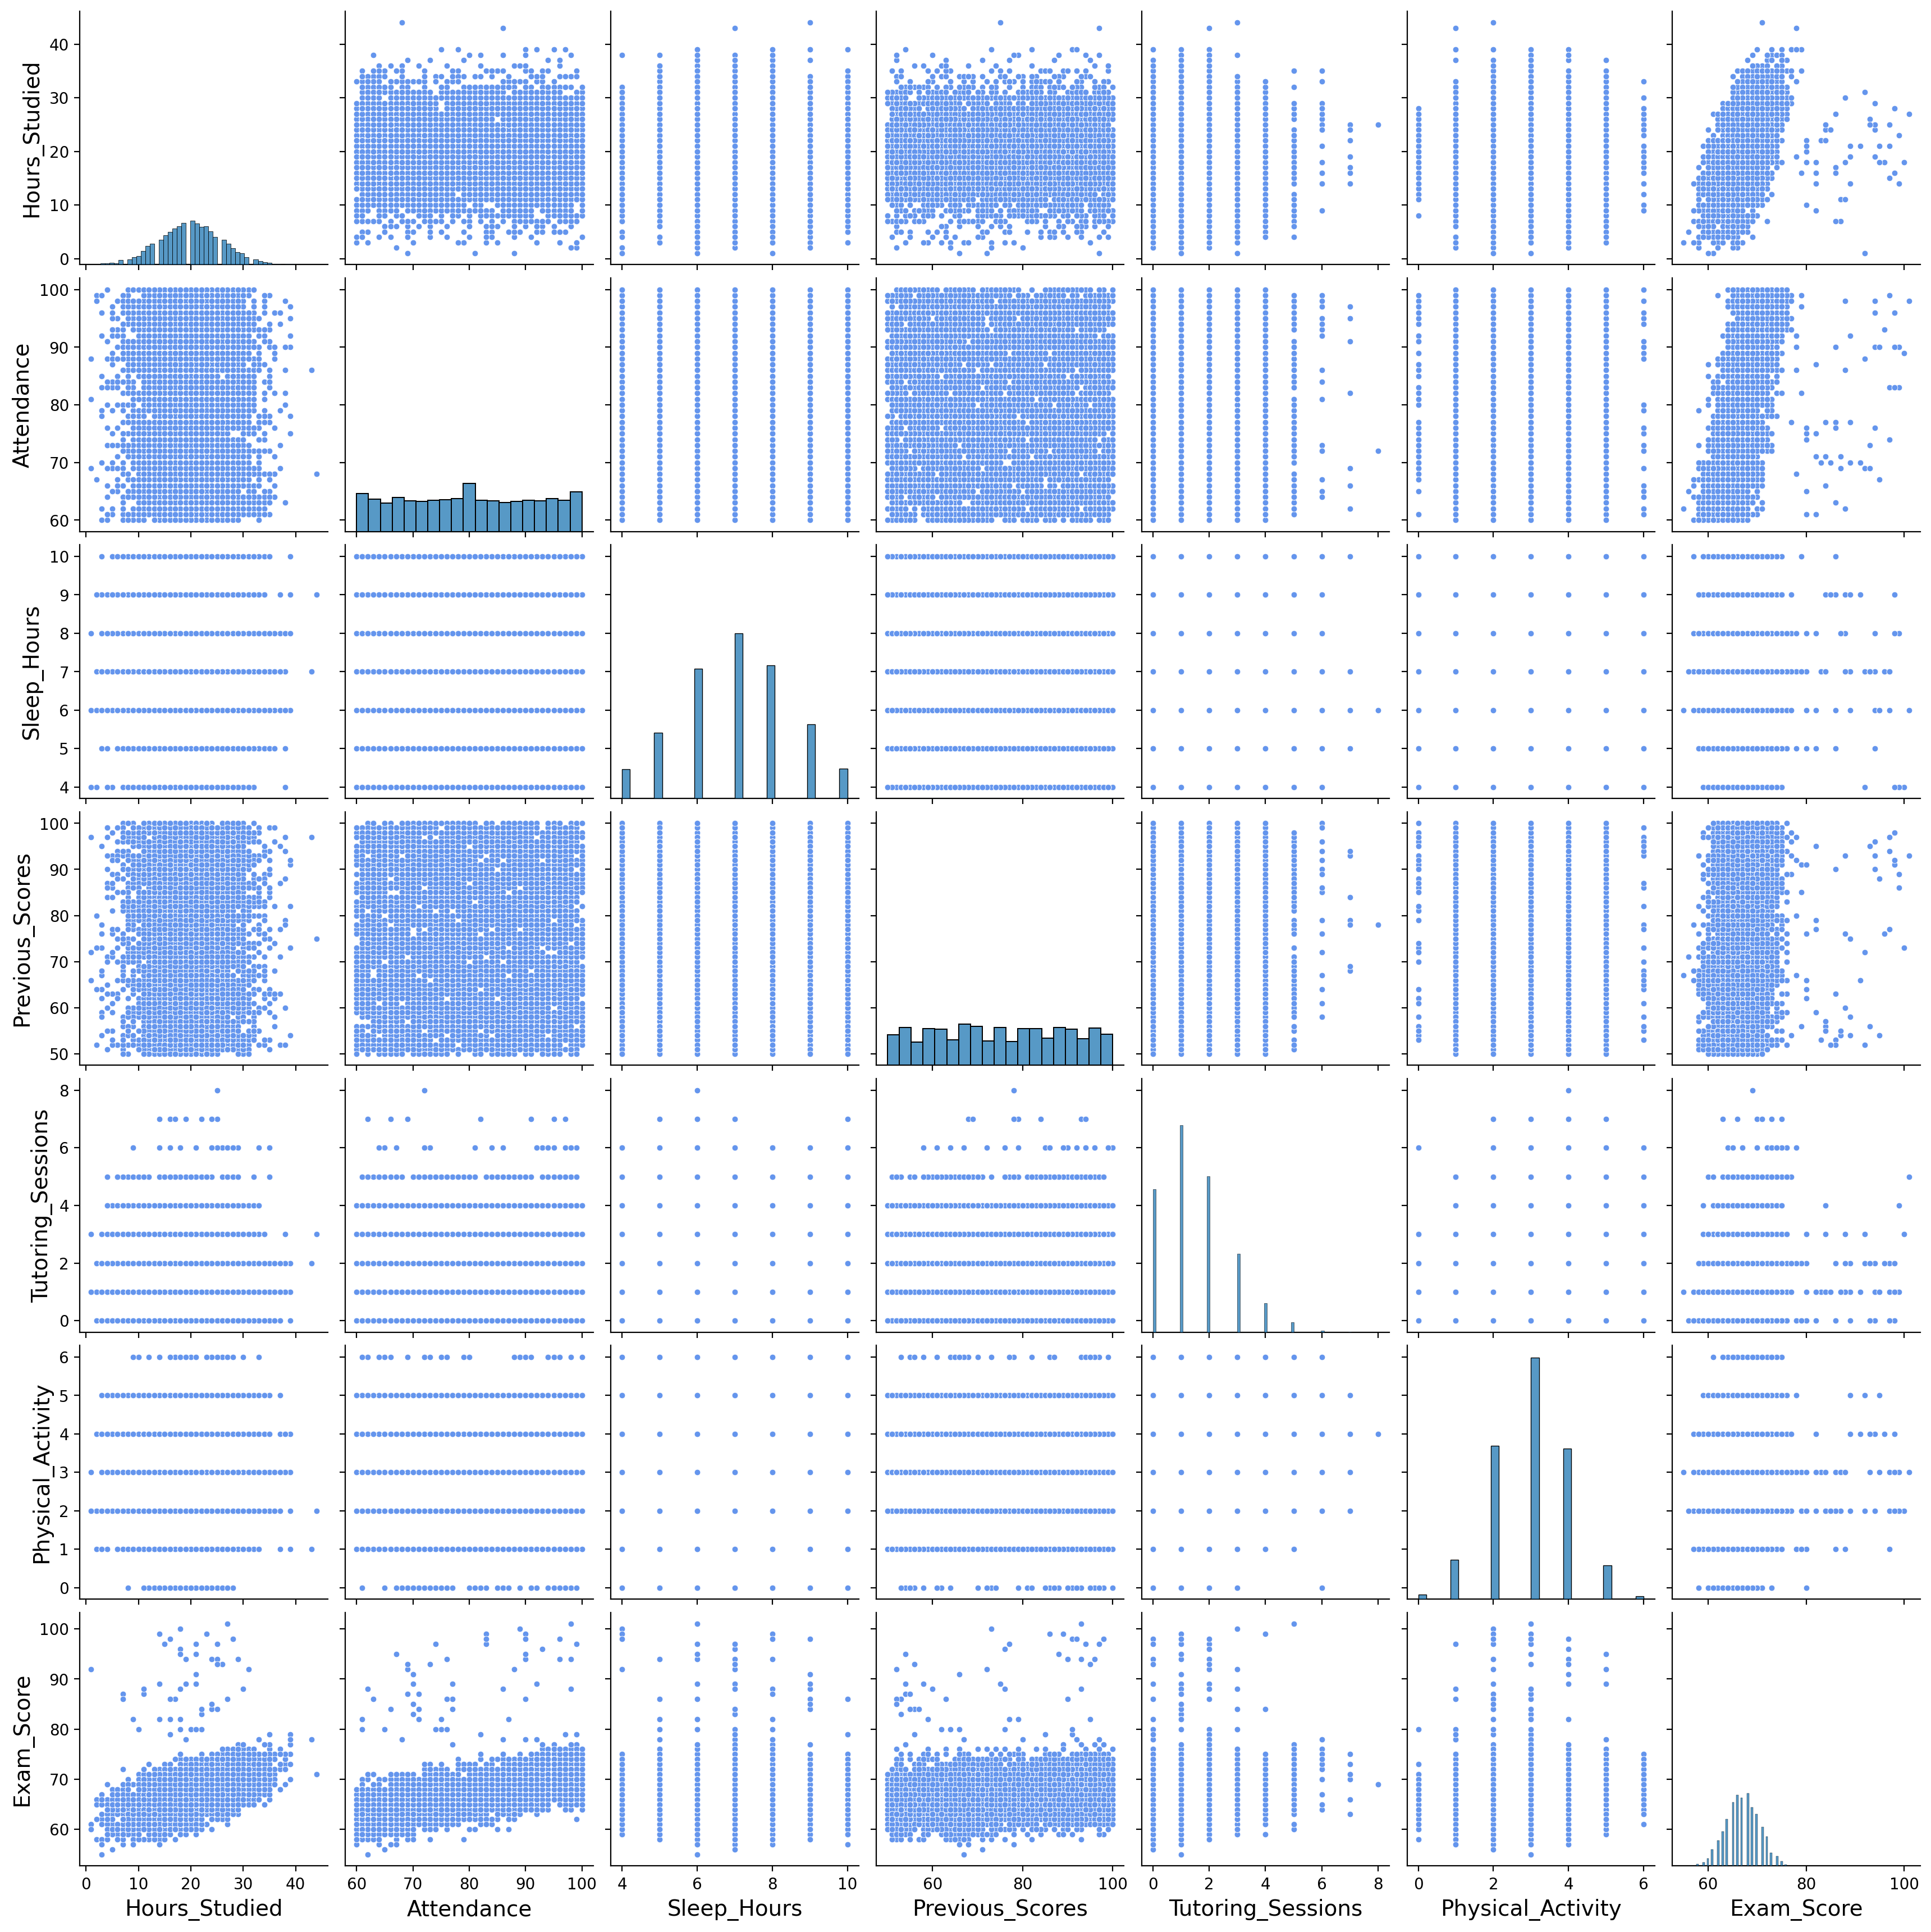

In [26]:
sns.pairplot(students_adjusted[numerical_variables], diag_kind='hist', plot_kws={'s': 15, 'color': colors['blue']})

##### Correlation heatmap

In [27]:
student_corr = students_adjusted[numeric_cols].corr()

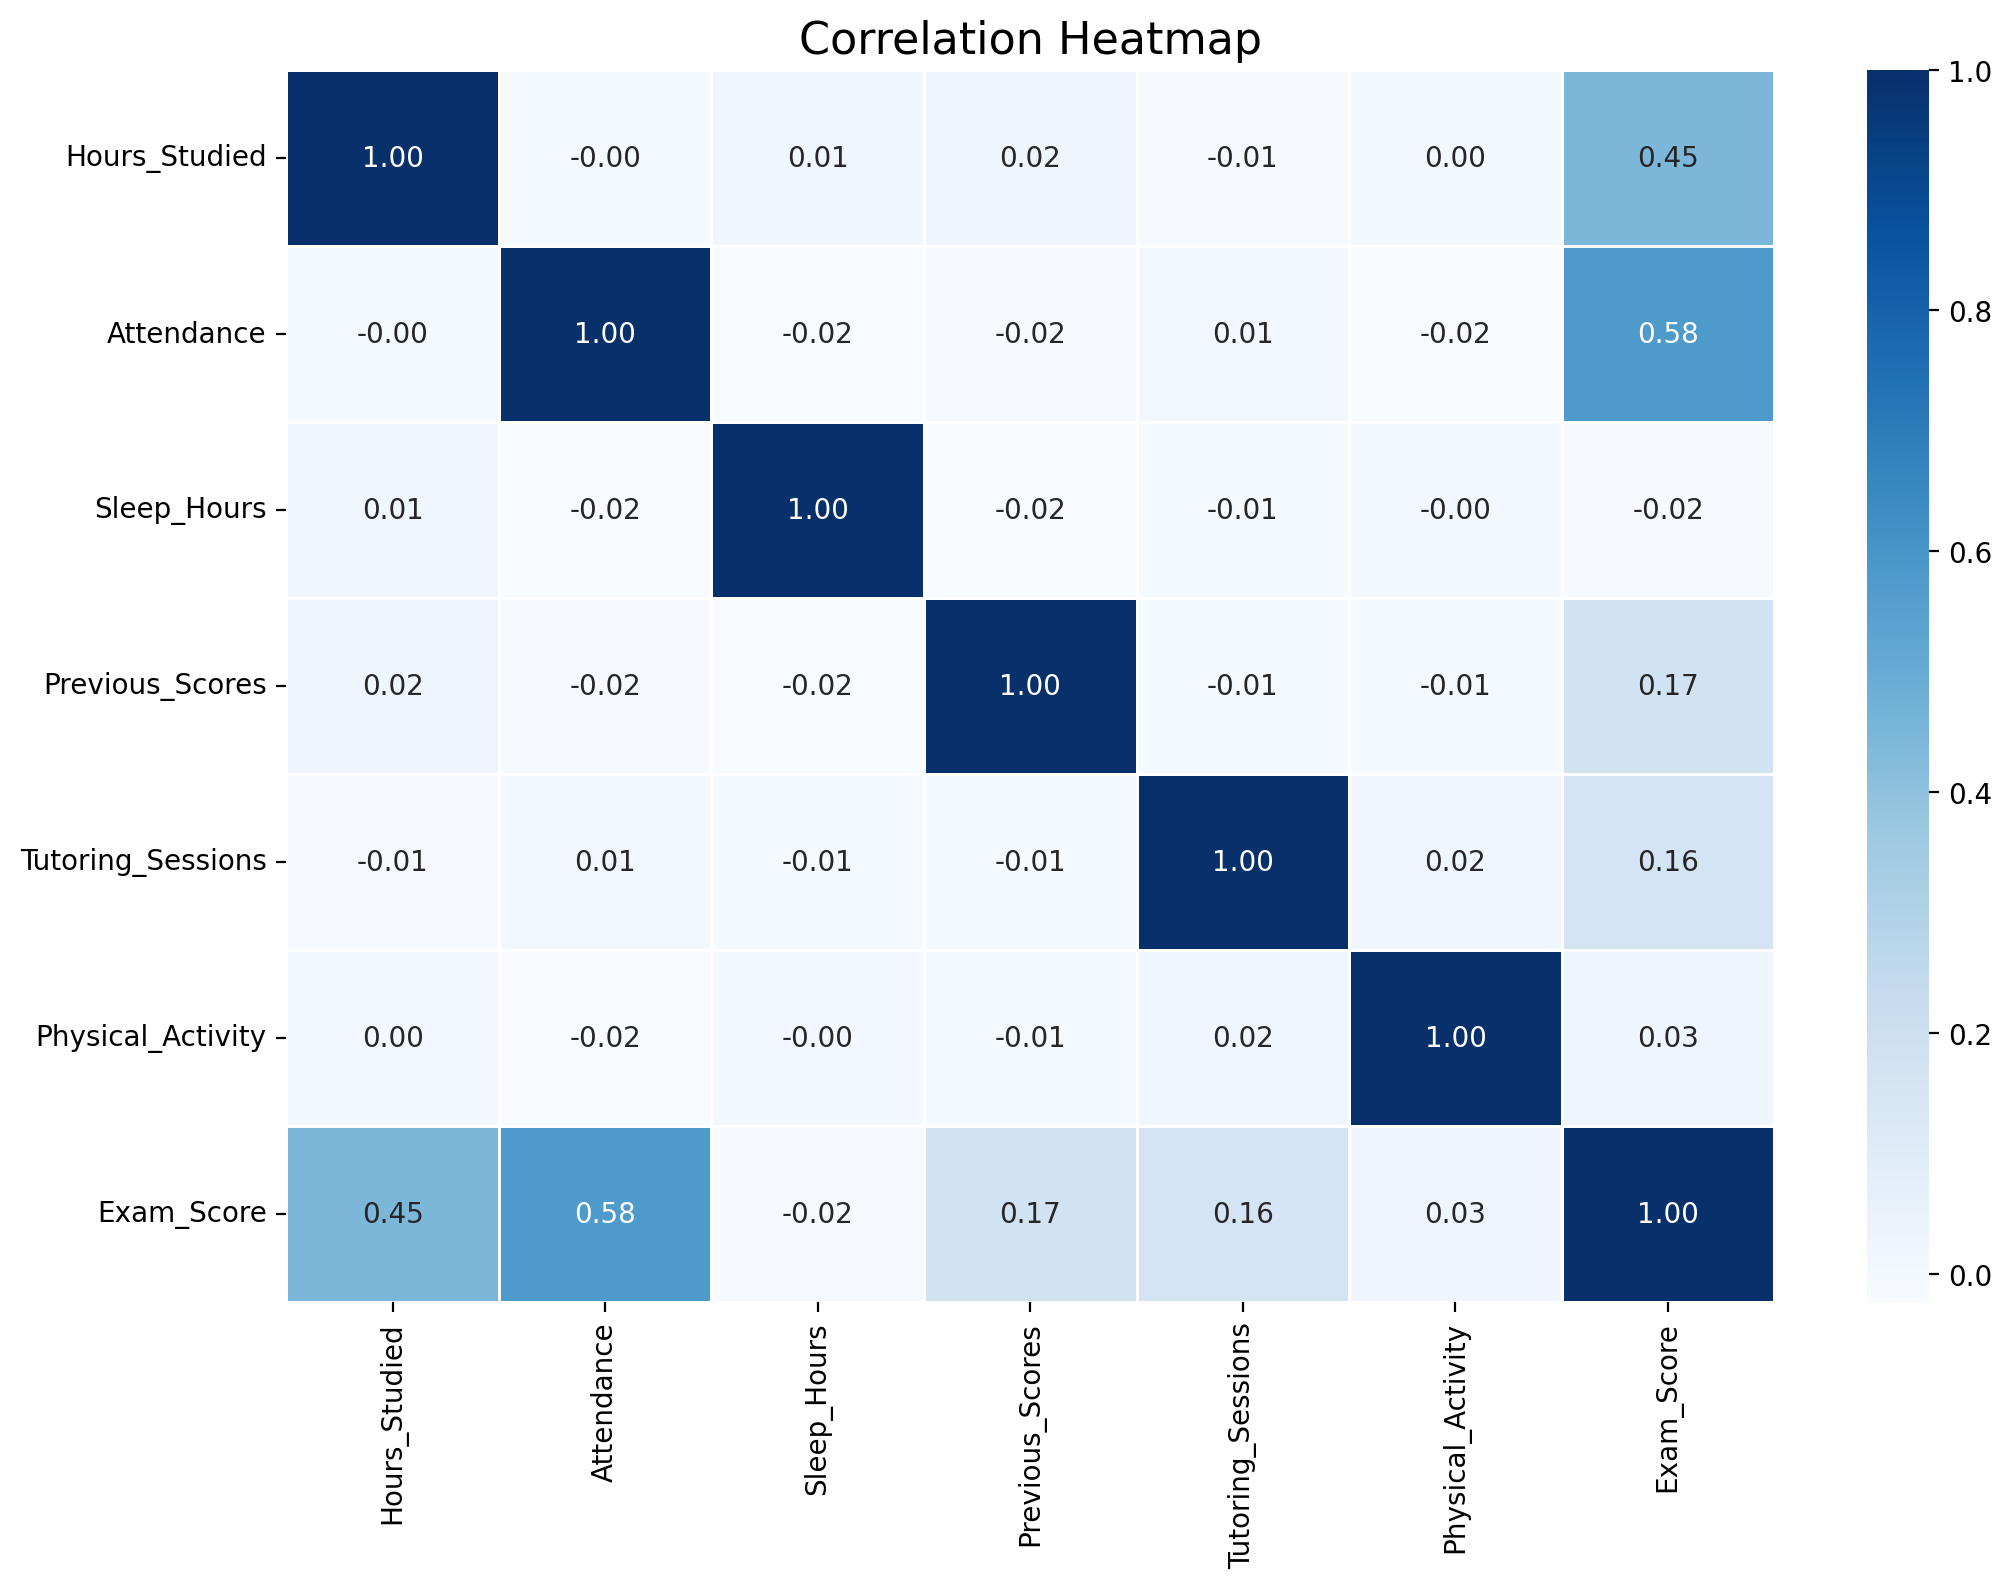

In [28]:
plt.figure()
sns.heatmap(student_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Our hypotheses

Since we were able to see some linear relationship between a few of our numerical variables and `Exam_Score`, we have decided to pick this variable as our response variable.

The correlation heatmap also supports our choice of response variable, where we can see correlation between exam scores and the rest of the variables.

In the context of our problem, modeling student performance, we think choosing exam scores as our response variable is a good way to ascertain how students perform, and which factors influence the way they score in tests.

We have initially seen linearity in the scatterplots between exam score and hours studied, attendance, previous scores and tutoring sessions. We'll try to assess wether or not these numerical variables are statistically significant when predicting exam scores.

In regards to our remaining categorical variables after discarding based on confusion tables, we'll check for significance for all of them and try to ascertain which variables are best to include in our model with the goal of predicting exam scores.

As previously stated, the correlation heatmap seems to indicate we don't have severe multicollinearity. Further checks need to be done to ensure this.

We have to consider the fact that Exam Scores are clustered around 65 out of 100, and we have what we could consider some outliers in the higher ranges. Based on this, we think we may encounter that the high scores have a different relationship to the predictors compared to the majority of the other scores, which are around the 65%.

<div class="alert alert-block alert-success">

**Our response variable will be: <kbd>Exam_Score</kbd>**

</div>

Let's define our final dataset to perform MLR on:

In [29]:
performance = students_adjusted.copy()

In [30]:
students_adjusted.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

## Initial Model

In [31]:
X = students_adjusted.drop('Exam_Score', axis=1)
y = students_adjusted['Exam_Score']

In [32]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [33]:
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


results = pd.DataFrame(columns=[
    'Predictor', 'Correlation', 'P-value', 'R-squared', 'Adj_R-squared', 'VIF', 
    'T-statistic', 'F-statistic', 'AIC', 'BIC', 
    'ANOVA_Type1_F', 'ANOVA_Type1_P', 
    'ANOVA_Type2_F', 'ANOVA_Type2_P', 
    'ANOVA_Type3_F', 'ANOVA_Type3_P'
])

In [34]:
for i, predictor in enumerate(X.columns):
    X_i = sm.add_constant(X_scaled[:, i])
    model = sm.OLS(y, X_i).fit()
    
    p_value = model.pvalues.iloc[1]
    rsq = model.rsquared
    adj_rsq = model.rsquared_adj
    t_statistic = model.tvalues.iloc[1]
    f_statistic = model.fvalue
    vif = variance_inflation_factor(X_scaled, i)
    aic = model.aic  
    bic = model.bic  
    
    correlation = pd.Series(X_scaled[:, i]).corr(y)
    
    formula = f'Exam_Score ~ {predictor}'
    model_anova = smf.ols(formula, data=students_adjusted).fit()

    anova_type1 = anova_lm(model_anova, typ=1)
    anova_type1_f = anova_type1['F'].iloc[0]
    anova_type1_p = anova_type1['PR(>F)'].iloc[0]
    
    anova_type2 = anova_lm(model_anova, typ=2)
    anova_type2_f = anova_type2['F'].iloc[0]
    anova_type2_p = anova_type2['PR(>F)'].iloc[0]
    
    anova_type3 = anova_lm(model_anova, typ=3)
    anova_type3_f = anova_type3['F'].iloc[0]
    anova_type3_p = anova_type3['PR(>F)'].iloc[0]
    
    current_results = pd.DataFrame({
        'Predictor': [predictor],
        'Correlation': [correlation],  # Correlation in the second column
        'P-value': [p_value],
        'R-squared': [rsq],
        'Adj_R-squared': [adj_rsq],
        'VIF': [vif],
        'T-statistic': [t_statistic],
        'F-statistic': [f_statistic],
        'AIC': [aic],
        'BIC': [bic],
        'ANOVA_Type1_F': [anova_type1_f],
        'ANOVA_Type1_P': [anova_type1_p],
        'ANOVA_Type2_F': [anova_type2_f],
        'ANOVA_Type2_P': [anova_type2_p],
        'ANOVA_Type3_F': [anova_type3_f],
        'ANOVA_Type3_P': [anova_type3_p]
    })

    current_results = current_results.dropna(how='all', axis=1)
    results = pd.concat([results, current_results], ignore_index=True)

results_sorted = results.sort_values(by='Adj_R-squared', ascending=False)
results_sorted

/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/3609911391.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Predictor  Correlation        P-value  R-squared  \
1                   Attendance     0.003104   0.000000e+00   0.336700   
0                Hours_Studied     0.003507  4.524802e-308   0.198118   
6              Previous_Scores     0.019833   1.121433e-44   0.030375   
9            Tutoring_Sessions     0.002661   2.102216e-36   0.024595   
13              Peer_Influence     0.008092   2.105122e-15   0.009827   
2         Parental_Involvement     0.007785   5.259722e-14   0.008843   
3          Access_to_Resources     0.000353   1.446812e-12   0.007830   
17          Distance_from_Home    -0.005317   1.830671e-12   0.007759   
15       Learning_Disabilities    -0.005272   1.921126e-11   0.007041   
4   Extracurricular_Activities     0.013779   4.646554e-07   0.003977   
11             Teacher_Quality    -0.010520   2.191872e-06   0.003510   
8              Internet_Access    -0.000532   4.412828e-05   0.002614   
16    Parental_Education_Level     0.012913   1.112637e-03   0.001666   
14           Physical_Activity    -0.011554   4.461342e-02   0.000632   
10               Family_Income     0.008112   7.047761e-02   0.000513   
7             Motivation_Level    -0.012348   1.561947e-01   0.000315   
5                  Sleep_Hours     0.010594   1.703173e-01   0.000295   
12                 School_Type    -0.012893   3.854988e-01   0.000118   
18                      Gender     0.003920   6.936955e-01   0.000024   

    Adj_R-squared       VIF  T-statistic  F-statistic           AIC  \
1        0.336596  1.003434    56.890623  3236.542960  32891.664424   
0        0.197992  1.002271    39.689943  1575.291562  34101.790605   
6        0.030223  1.003842    14.132771   199.735203  35313.278862   
9        0.024442  1.001632    12.679697   160.774705  35351.180193   
13       0.009672  1.002203     7.954933    63.280966  35447.022378   
2        0.008688  1.002094    -7.542343    56.886934  35453.358706   
3        0.007675  1.003961    -7.093709    50.320703  35459.872237   
17       0.007603  1.002023     7.060830    49.855316  35460.334142   
15       0.006885  1.002373    -6.724033    45.212618  35464.943930   
4        0.003821  1.001554     5.045584    25.457916  35484.595934   
11       0.003354  1.001000    -4.739229    22.460292  35487.583273   
8        0.002457  1.002215     4.087563    16.708173  35493.319577   
16       0.001509  1.003001     3.261866    10.639768  35499.376896   
14       0.000476  1.005148     2.008678     4.034786  35505.976356   
10       0.000356  1.003256    -1.809132     3.272958  35506.737986   
7        0.000159  1.002466    -1.418154     2.011161  35507.999656   
5        0.000138  1.002320    -1.371340     1.880573  35508.130246   
12      -0.000039  1.002547    -0.867869     0.753196  35509.257743   
18      -0.000133  1.001838    -0.393863     0.155128  35509.855956   

             BIC  ANOVA_Type1_F  ANOVA_Type1_P  ANOVA_Type2_F  ANOVA_Type2_P  \
1   32905.185643    3236.542960   0.000000e+00    3236.542960   0.000000e+00   
0   34115.311825    1575.291562  4.524802e-308    1575.291562  4.524802e-308   
6   35326.800082     199.735203   1.121433e-44     199.735203   1.121433e-44   
9   35364.701412     160.774705   2.102216e-36     160.774705   2.102216e-36   
13  35460.543598      32.180333   1.242613e-14      32.180333   1.242613e-14   
2   35466.879926      80.462228   3.086485e-35      80.462228   3.086485e-35   
3   35473.393457      92.416360   2.722170e-40      92.416360   2.722170e-40   
17  35473.855361      24.936704   1.630308e-11      24.936704   1.630308e-11   
15  35478.465150      45.212618   1.921126e-11      45.212618   1.921126e-11   
4   35498.117154      25.457916   4.646554e-07      25.457916   4.646554e-07   
11  35501.104493      18.597490   8.844704e-09      18.597490   8.844704e-09   
8   35506.840797      16.708173   4.412828e-05      16.708173   4.412828e-05   
16  35512.898116      35.947108   2.990498e-16      35.947108   2.990498e-16   
14  35519.497576   

In [82]:
results_sorted.iloc[:,:10]

Predictor  Correlation        P-value  R-squared  \
1                   Attendance     0.003104   0.000000e+00   0.336700   
0                Hours_Studied     0.003507  4.524802e-308   0.198118   
6              Previous_Scores     0.019833   1.121433e-44   0.030375   
9            Tutoring_Sessions     0.002661   2.102216e-36   0.024595   
13              Peer_Influence     0.008092   2.105122e-15   0.009827   
2         Parental_Involvement     0.007785   5.259722e-14   0.008843   
3          Access_to_Resources     0.000353   1.446812e-12   0.007830   
17          Distance_from_Home    -0.005317   1.830671e-12   0.007759   
15       Learning_Disabilities    -0.005272   1.921126e-11   0.007041   
4   Extracurricular_Activities     0.013779   4.646554e-07   0.003977   
11             Teacher_Quality    -0.010520   2.191872e-06   0.003510   
8              Internet_Access    -0.000532   4.412828e-05   0.002614   
16    Parental_Education_Level     0.012913   1.112637e-03   0.001666   
14           Physical_Activity    -0.011554   4.461342e-02   0.000632   
10               Family_Income     0.008112   7.047761e-02   0.000513   
7             Motivation_Level    -0.012348   1.561947e-01   0.000315   
5                  Sleep_Hours     0.010594   1.703173e-01   0.000295   
12                 School_Type    -0.012893   3.854988e-01   0.000118   
18                      Gender     0.003920   6.936955e-01   0.000024   

    Adj_R-squared       VIF  T-statistic  F-statistic           AIC  \
1        0.336596  1.003434    56.890623  3236.542960  32891.664424   
0        0.197992  1.002271    39.689943  1575.291562  34101.790605   
6        0.030223  1.003842    14.132771   199.735203  35313.278862   
9        0.024442  1.001632    12.679697   160.774705  35351.180193   
13       0.009672  1.002203     7.954933    63.280966  35447.022378   
2        0.008688  1.002094    -7.542343    56.886934  35453.358706   
3        0.007675  1.003961    -7.093709    50.320703  35459.872237   
17       0.007603  1.002023     7.060830    49.855316  35460.334142   
15       0.006885  1.002373    -6.724033    45.212618  35464.943930   
4        0.003821  1.001554     5.045584    25.457916  35484.595934   
11       0.003354  1.001000    -4.739229    22.460292  35487.583273   
8        0.002457  1.002215     4.087563    16.708173  35493.319577   
16       0.001509  1.003001     3.261866    10.639768  35499.376896   
14       0.000476  1.005148     2.008678     4.034786  35505.976356   
10       0.000356  1.003256    -1.809132     3.272958  35506.737986   
7        0.000159  1.002466    -1.418154     2.011161  35507.999656   
5        0.000138  1.002320    -1.371340     1.880573  35508.130246   
12      -0.000039  1.002547    -0.867869     0.753196  35509.257743   
18      -0.000133  1.001838    -0.393863     0.155128  35509.855956   

             BIC  
1   32905.185643  
0   34115.311825  
6   35326.800082  
9   35364.701412  
13  35460.543598  
2   35466.879926  
3   35473.393457  
17  35473.855361  
15  35478.465150  
4   35498.117154  
11  35501.104493  
8   35506.840797  
16  35512.898116  
14  35519.497576  
10  35520.259206  
7   35521.520876  
5   35521.651465  
12  35522.778962  
18  35523.377176

In [86]:
latex = results_sorted.iloc[:,:10].to_latex(index=False, caption='Fitting an SLR model for each predictor.', label='tab:intial-model')
print(latex)

\begin{table}
\caption{Fitting an SLR model for each predictor.}
\label{tab:intial-model}
\begin{tabular}{lrrrrrrrrr}
\toprule
Predictor & Correlation & P-value & R-squared & Adj_R-squared & VIF & T-statistic & F-statistic & AIC & BIC \\
\midrule
Attendance & 0.003104 & 0.000000 & 0.336700 & 0.336596 & 1.003434 & 56.890623 & 3236.542960 & 32891.664424 & 32905.185643 \\
Hours_Studied & 0.003507 & 0.000000 & 0.198118 & 0.197992 & 1.002271 & 39.689943 & 1575.291562 & 34101.790605 & 34115.311825 \\
Previous_Scores & 0.019833 & 0.000000 & 0.030375 & 0.030223 & 1.003842 & 14.132771 & 199.735203 & 35313.278862 & 35326.800082 \\
Tutoring_Sessions & 0.002661 & 0.000000 & 0.024595 & 0.024442 & 1.001632 & 12.679697 & 160.774705 & 35351.180193 & 35364.701412 \\
Peer_Influence & 0.008092 & 0.000000 & 0.009827 & 0.009672 & 1.002203 & 7.954933 & 63.280966 & 35447.022378 & 35460.543598 \\
Parental_Involvement & 0.007785 & 0.000000 & 0.008843 & 0.008688 & 1.002094 & -7.542343 & 56.886934 & 35453.358706

After looking at the $R^2_{a}$ of exam score regressed onto each individual predictor, we're going to naively choose the 6 predictors with the strongest $R^2_{a}$ values to model.

In [35]:
selected_predictors = [
    'Attendance', 
    'Hours_Studied', 
    'Previous_Scores', 
    'Tutoring_Sessions', 
    'Peer_Influence', 
    'Parental_Involvement'
]

categorical_predictors = ['Peer_Influence', 'Parental_Involvement']

X = students_adjusted[selected_predictors]
y = students_adjusted['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

le = LabelEncoder()
for col in categorical_predictors:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)  
model = sm.OLS(y_train, X_train_scaled).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1117.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:42:44   Log-Likelihood:                -10378.
No. Observations:                4464   AIC:                         2.077e+04
Df Residuals:                    4457   BIC:                         2.081e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.2581      0.037   1815.017      0.0

Since the model has a moderate $R^2_{a}$ value, we want to look at the residuals to ensure that none of the model assumptions were violated. 

In [36]:
X_test_scaled = sm.add_constant(X_test_scaled)  
y_pred = model.predict(X_test_scaled)

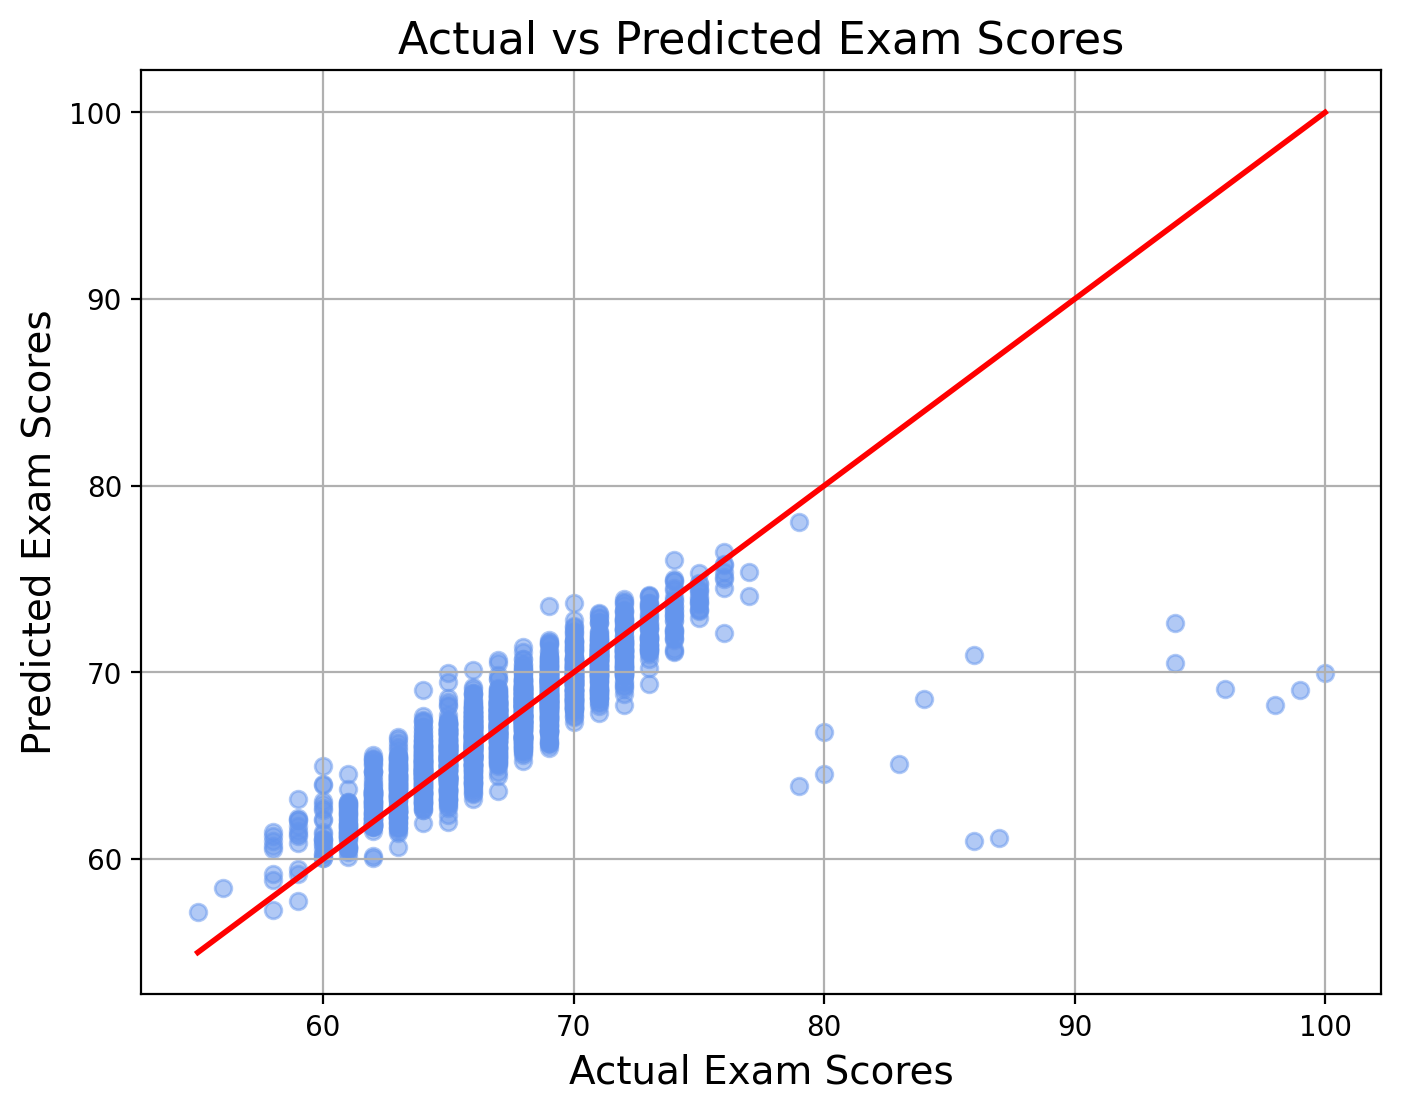

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color=colors['blue'], alpha=.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=colors['red'], lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.grid(True)
plt.show()

There are some points that don't align with the rest of the distribution and might be influential points. 

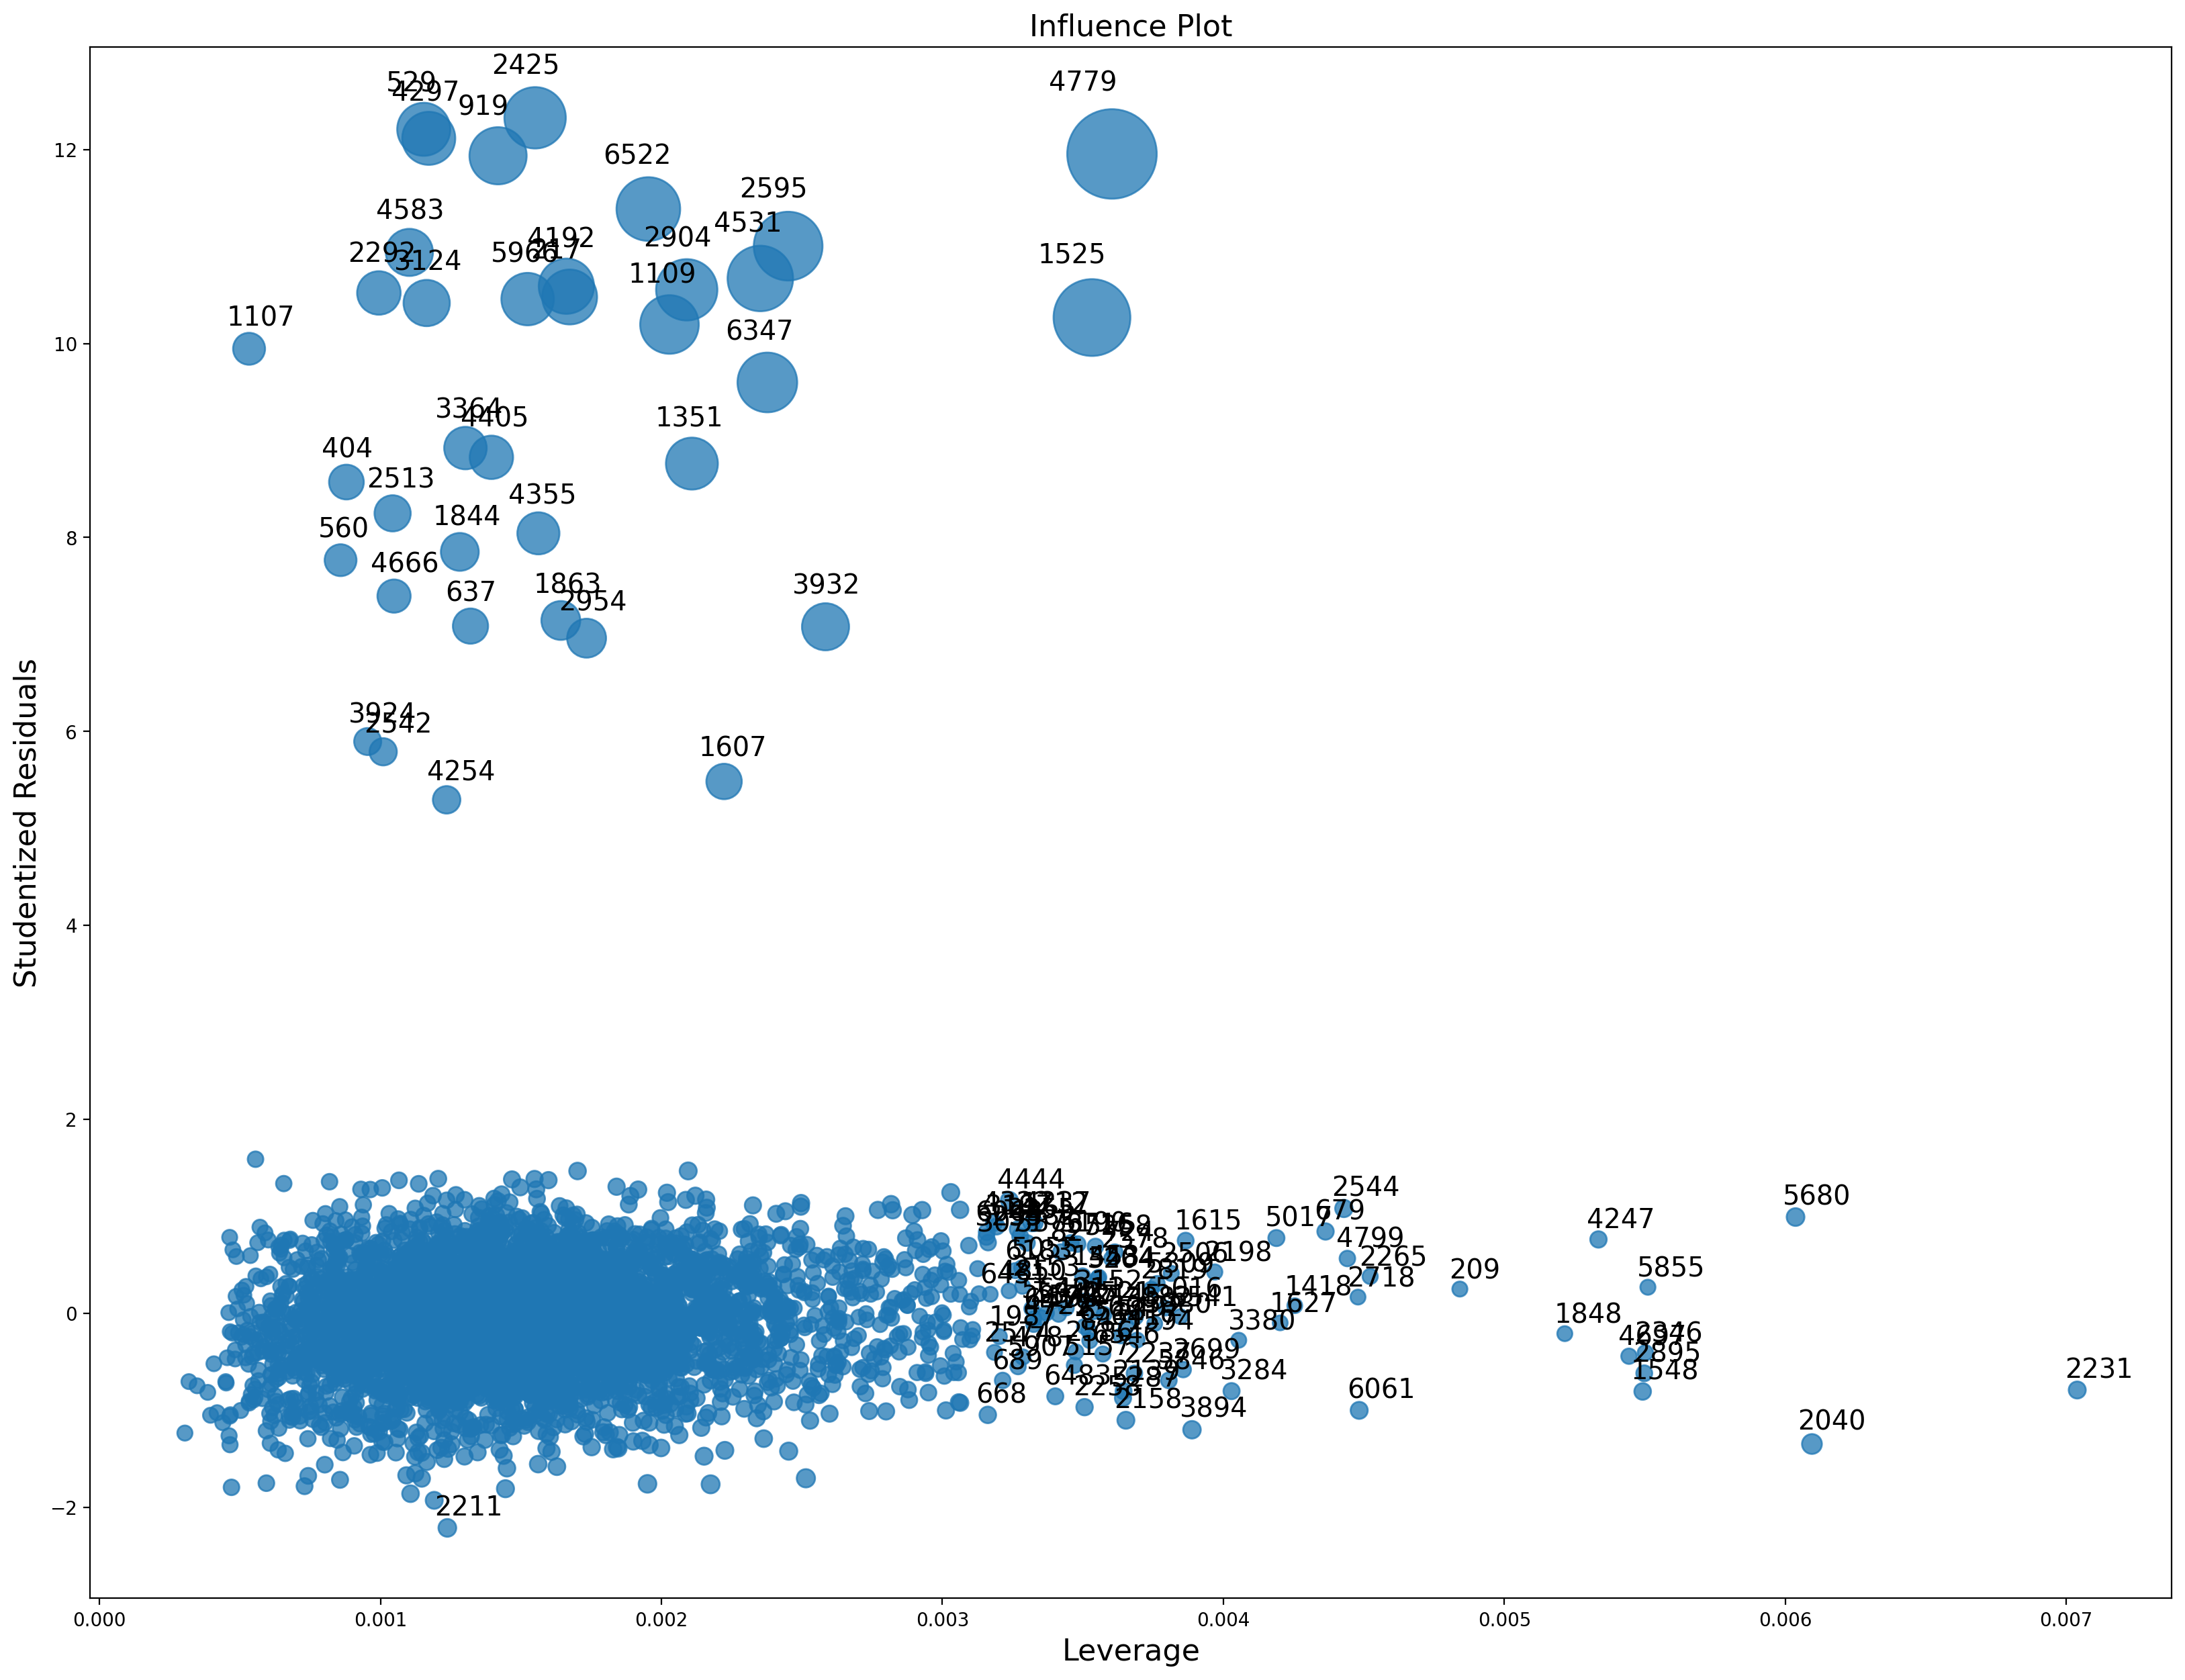

In [38]:
fig, ax = plt.subplots(figsize=(20,15))
influence_plot(model, ax=ax, criterion="cooks")
plt.show()

There are a significant number of influential points so we're going to do some transformations on the data.

## Box-Cox Transformation

In [39]:
le = LabelEncoder()
for col in categorical_predictors:
    X.loc[:, col] = le.fit_transform(X[col]) 

X_boxcox = X.apply(lambda x: stats.boxcox(x + 1)[0]) 
y_boxcox, fitted_lambda = stats.boxcox(y + 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_boxcox)

X_const = sm.add_constant(X_scaled)
model_boxcox = sm.OLS(y_boxcox, X_const).fit()
print("Box-Cox Transformation Model Summary")
print(f"Lambda used for Box-Cox Transformation: {fitted_lambda}")
print(model_boxcox.summary())


Box-Cox Transformation Model Summary
Lambda used for Box-Cox Transformation: -2.6806950740503064
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     2814.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:43:05   Log-Likelihood:                 85921.
No. Observations:                6378   AIC:                        -1.718e+05
Df Residuals:                    6371   BIC:                        -1.718e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/2231151566.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 0 1 ... 0 2 2]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/2231151566.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 2 ... 2 0 2]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.


The $R^2$has improved so now we'll see how the residuals have changed. 

In [40]:
y_pred_boxcox = model_boxcox.predict(X_const)
residuals = y_boxcox - y_pred_boxcox

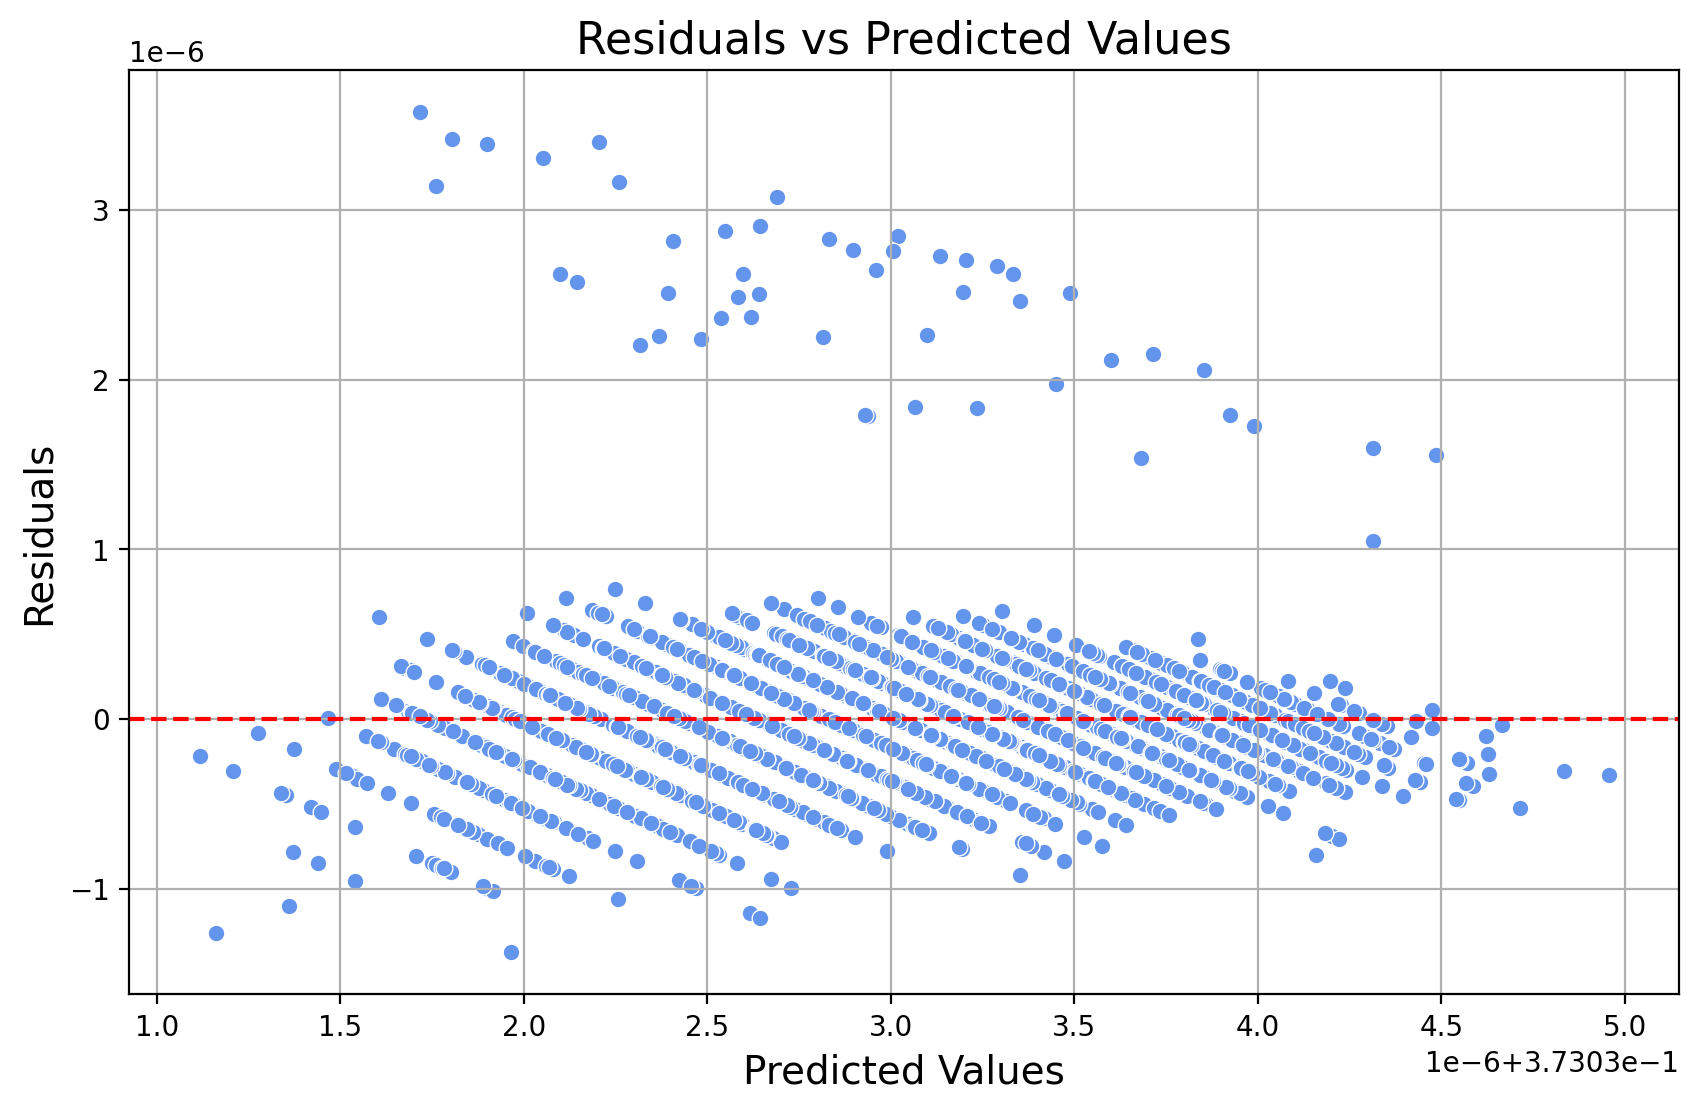

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_boxcox, y=residuals, color=colors['blue'])
plt.axhline(0, color=colors['red'], linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

There still seems to be a significant amount of data that's falling outside the expected bounds of the data so we'll try including more predictors and splitting the data into multiple models.

## Splitting the Data Into 2 Models

### Set Up

In [42]:
high_scores = students[students['Exam_Score'] >= 80].reset_index()
low_scores = students[students['Exam_Score'] < 80].reset_index()
print(f"There are {len(low_scores)} rows within the low scores dataset.")
print(f"There are {len(high_scores)} rows within the high scores dataset.")

There are 6330 rows within the low scores dataset.
There are 48 rows within the high scores dataset.


After creating two new datasets, we're going to use those datasets to make training and test datasets for each model. 

In [43]:
train_high, test_high = train_test_split(high_scores, test_size=0.2, random_state=42)
train_low, test_low = train_test_split(low_scores, test_size=0.2, random_state=42)
print(f"There are {len(train_low)} rows within the low scores training dataset.")
print(f"There are {len(train_high)} rows within the high scores training dataset.")

There are 5064 rows within the low scores training dataset.
There are 38 rows within the high scores training dataset.


In [44]:
X_train_high = train_high.drop('Exam_Score', axis= 1)
y_train_high = train_high['Exam_Score']

X_test_high = test_high.drop('Exam_Score', axis= 1)
y_test_high = test_high['Exam_Score']

X_train_low = train_low.drop('Exam_Score', axis= 1)
y_train_low = train_low['Exam_Score']

X_test_low = test_low.drop('Exam_Score', axis= 1)
y_test_low = test_low['Exam_Score']

In [45]:
categorical_cols1 = X_train_high.select_dtypes(include=['object', 'category']).columns
numerical_cols1 = X_train_high.select_dtypes(include=['int64', 'float64']).columns

categorical_cols2 = X_test_high.select_dtypes(include=['object', 'category']).columns
numerical_cols2 = X_test_high.select_dtypes(include=['int64', 'float64']).columns

categorical_cols3 = X_train_low.select_dtypes(include=['object', 'category']).columns
numerical_cols3 = X_train_low.select_dtypes(include=['int64', 'float64']).columns

categorical_cols4 = X_test_low.select_dtypes(include=['object', 'category']).columns
numerical_cols4 = X_test_low.select_dtypes(include=['int64', 'float64']).columns

In [46]:
preprocessor_train_high = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols1),
        ('cat', OneHotEncoder(drop='first'), categorical_cols1)  # drop='first' avoids dummy variable trap
    ]
)

preprocessor_test_high = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols2),
        ('cat', OneHotEncoder(drop='first'), categorical_cols2)  # drop='first' avoids dummy variable trap
    ]
)
preprocessor_train_low = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols3),
        ('cat', OneHotEncoder(drop='first'), categorical_cols3)  # drop='first' avoids dummy variable trap
    ]
)

preprocessor_test_low = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols4),
        ('cat', OneHotEncoder(drop='first'), categorical_cols4)  # drop='first' avoids dummy variable trap
    ]
)

## Low Model

Students who scored 80 or lower on their exam.

In [47]:
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_train_low),
    ('lasso', Lasso(alpha=0.1))  # You can adjust alpha for regularization
])

lasso_pipeline.fit(X_train_low, y_train_low)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['index', 'Hours_Studied', 'Attendance', 'Sleep_Hours',
       'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
       'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Learning_Disabilities', 'Parental_Education_Level', 'Gender'],
      dtype='object'))])),
                ('lasso', Lasso(alpha=0.1))])

In [48]:
encoded_categorical_names = lasso_pipeline.named_steps['preprocessor'] \
    .transformers_[1][1].get_feature_names_out(categorical_cols1)

all_feature_names = list(numerical_cols1) + list(encoded_categorical_names)

lasso_coefficients = lasso_pipeline.named_steps['lasso'].coef_

selected_features = [name for name, coef in zip(all_feature_names, lasso_coefficients) if coef != 0]

print(f'Selected predictors: {selected_features}')

Selected predictors: ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Access_to_Resources_Low', 'Access_to_Resources_Medium', 'Extracurricular_Activities_Yes', 'Motivation_Level_Low', 'Family_Income_Low', 'Parental_Education_Level_High School', 'Parental_Education_Level_Postgraduate']


We let the lasso modeling tool pick the predictors to use which were: 'index', 'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Access_to_Resources', 'Internet_Access', 'Family_Income','Teacher_Quality', 'Teacher_Quality', 'School_Type', 'Parental_Education_Level', 'Gender'. We then dropped those predictors from the model


In [49]:
x_lasso_train_low = X_train_low.drop(columns=['Sleep_Hours', 
                      'Internet_Access', 
                      'Teacher_Quality', 'School_Type', 'Learning_Disabilities', 
                       'Gender', 'index'])
y_lasso_train = y_train_low
formula = 'Exam_Score ~ ' + ' + '.join(x_lasso_train_low.columns)

### Summarizing the model with the low score dataset:

In [50]:
lasso_model_low = smf.ols(formula= formula, data = train_low).fit()
lasso_model_low.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     3183.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:43:06   Log-Likelihood:                -7540.9
No. Observations:                5064   AIC:                         1.511e+04
Df Residuals:                    5049   BIC:                         1.521e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   42.0979      0.158    266.026      0.000      41.788      42.408
Access_to_Resources[T.Low]                  -1.9372      0.044    -44.274      0.000      -2.023      -1.851
Access_to_Resources[T.Medium]               -0.9681      0.035    -27.774      0.000      -1.036      -0.900
Extracurricular_Activities[T.Yes]            0.4688      0.031     15.212      0.000       0.408       0.529
Motivation_Level[T.Low]                     -0.9550      0.044    -21.845      0.000      -1.041      -0.869
Motivation_Level[T.Medium]                  -0.4403      0.040    -11.040      0.000      -0.519      -0.362
Family_Income[T.Low]                        -1.0166      0.042    -24.447      0.000      -1.098      -0.935
Family_Income[T.Medium]                     -0.4775      0.042    -11.470      0.000      -0.559      -0.396
Parental_Education_Level[T.High School]     -0.4723      0.035    -13.593      0.000      -0.540      -0.404
Parental_Education_Level[T.Postgraduate]     0.5296      0.043     12.201      0.000       0.444       0.615
Hours_Studied                                0.2976      0.003    117.166      0.000       0.293       0.303
Attendance                                   0.1991      0.001    152.018      0.000       0.196       0.202
Previous_Scores                              0.0470      0.001     44.784      0.000       0.045       0.049
Tutoring_Sessions                            0.4998      0.012     40.552      0.000       0.476       0.524
Physical_Activity                            0.2205      0.015     14.948      0.000       0.192       0.249
==============================================================================
Omnibus:                      872.171   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13229.088
Skew:                           0.352   Prob(JB):                         0.00
Kurtosis:                      10.887   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/3866888096.py:15: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


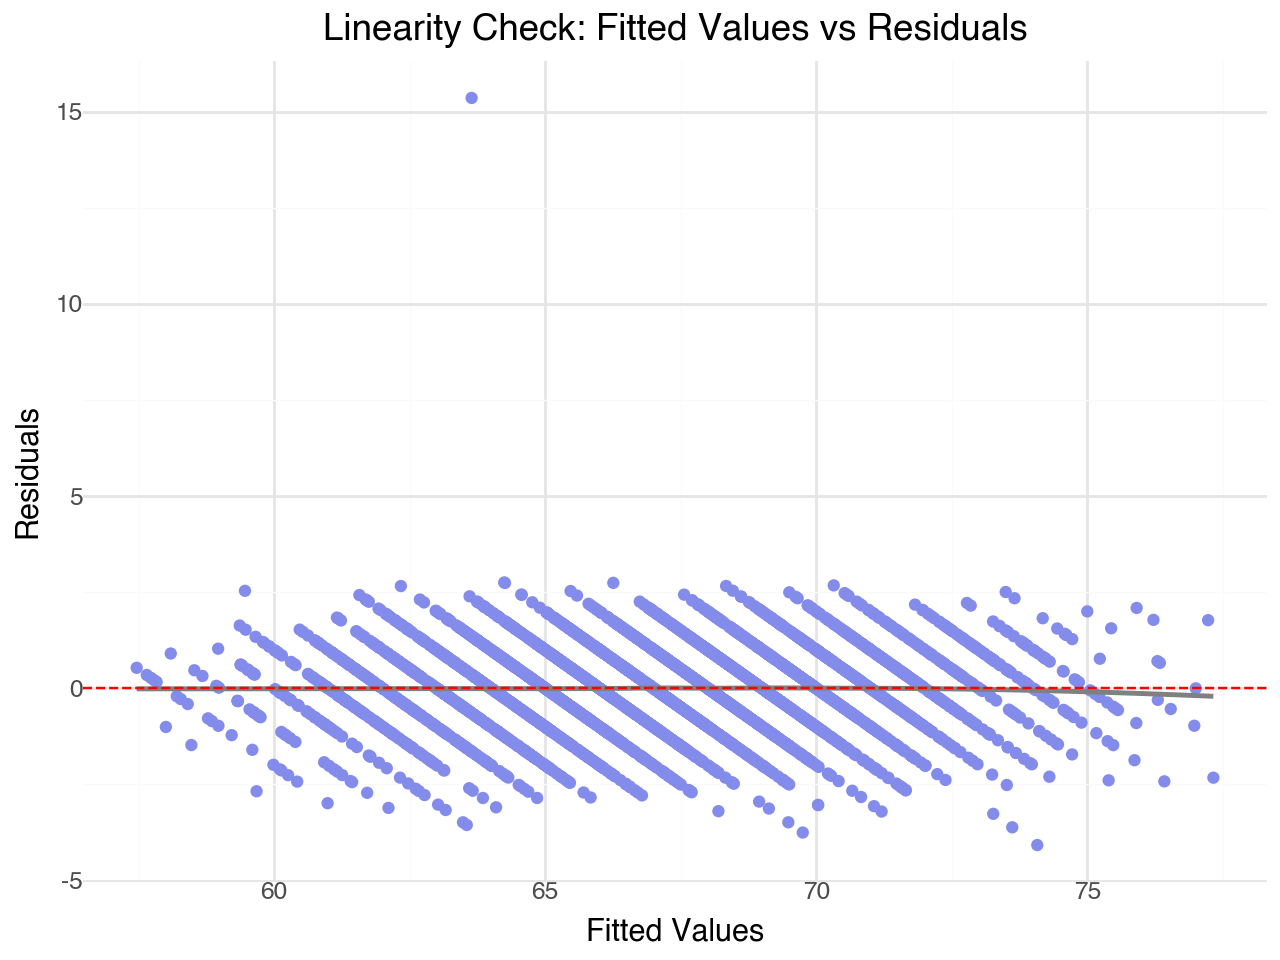

In [51]:
data = pd.DataFrame({
    'Fitted_Values': lasso_model_low.fittedvalues,
    'Residuals': lasso_model_low.resid
})

residual_plot = (
    ggplot(data, aes(x='Fitted_Values', y='Residuals')) +
    geom_point(color = "#838ceb") +  # Scatter plot of points
    geom_smooth(method='loess', color='grey', se=False, linetype='solid') +  # LOWESS line
    geom_hline(yintercept=0, linetype='dashed', color='red') +  # Horizontal line at y=0
    labs(x='Fitted Values', y='Residuals', title='Linearity Check: Fitted Values vs Residuals') +
    theme_minimal()  # Set the figure size
)

print(residual_plot)

After plotting the fitted values against the residual values, most of the data falls in the expected region which a few outliers visible. 

/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/2675193875.py:19: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


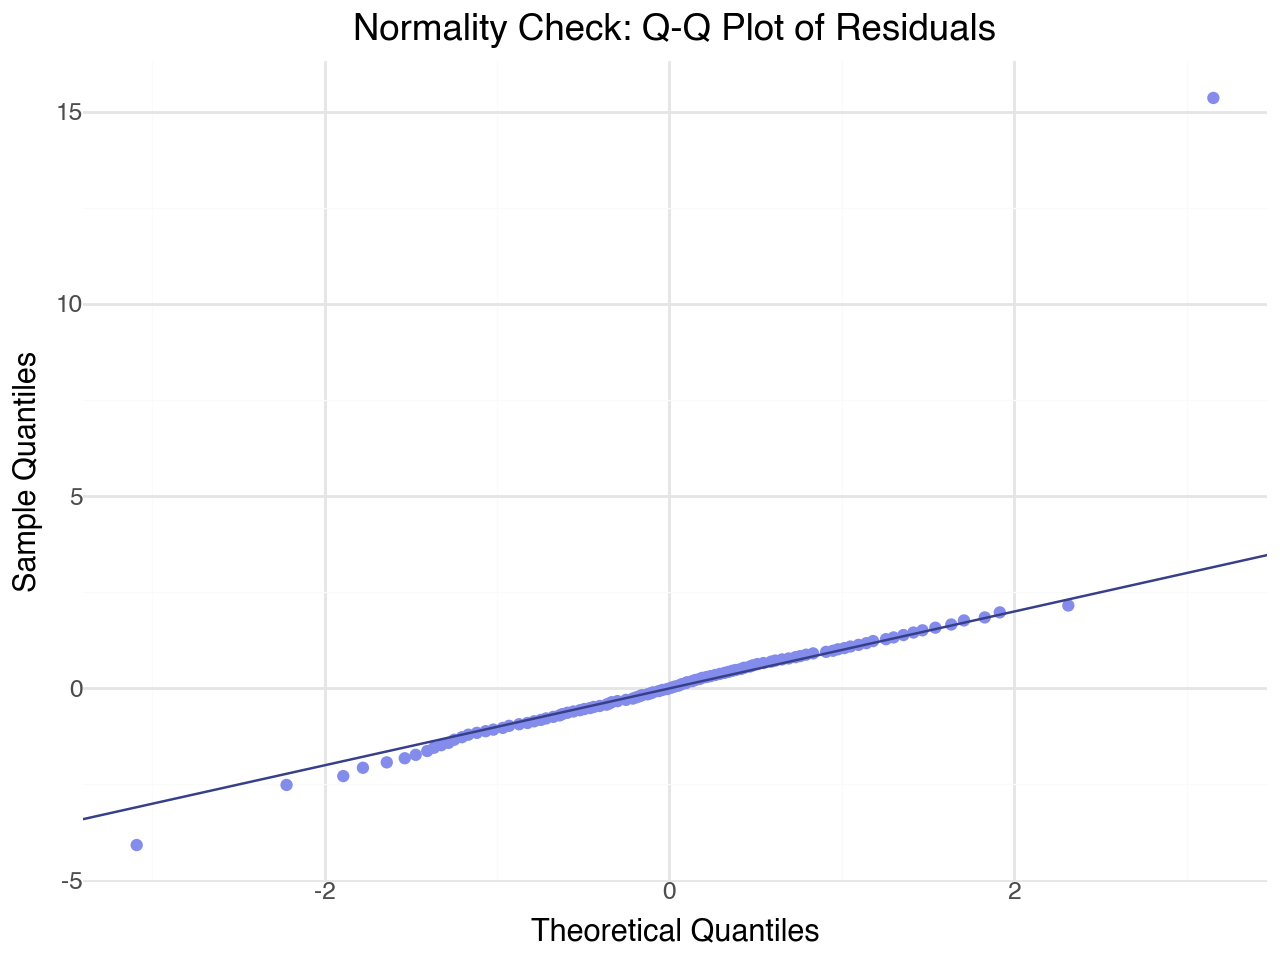

In [52]:
low_residuals = lasso_model_low.resid

quantiles = np.percentile(low_residuals, [i for i in range(0, 101)])
theoretical_quantiles = np.percentile(np.random.normal(0, 1, 1000), [i for i in range(0, 101)])

qq_data = pd.DataFrame({
    'Theoretical Quantiles': theoretical_quantiles,
    'Sample Quantiles': quantiles
})

gg = (ggplot(qq_data, aes(x='Theoretical Quantiles', y='Sample Quantiles')) +
      geom_point(color = "#838ceb") +
      geom_abline(slope=1, intercept=0, color='#373f8a') +
      labs(title='Normality Check: Q-Q Plot of Residuals',
           x='Theoretical Quantiles',
           y='Sample Quantiles') +
      theme_minimal())
      
print(gg)

After doing the QQ plot of the residuals, most of the data falls on the line which a few outliers visible. 

In [53]:
predictors_to_drop = ['Access_to_Resources', 'Extracurricular_Activities', 
                       'Family_Income', 'Motivation_Level', 'Parental_Education_Level']

train_long = train_low.melt(id_vars='Exam_Score', value_vars=x_lasso_train_low.columns,
                             var_name='Predictor', value_name='Value')
train_long_filtered = train_long[~train_long['Predictor'].isin(predictors_to_drop)]

For the purposes of graphing scatter plots, we temporarily dropped the categorical data. 

/opt/homebrew/anaconda3/lib/python3.12/site-packages/plotnine/themes/themeable.py:2419: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


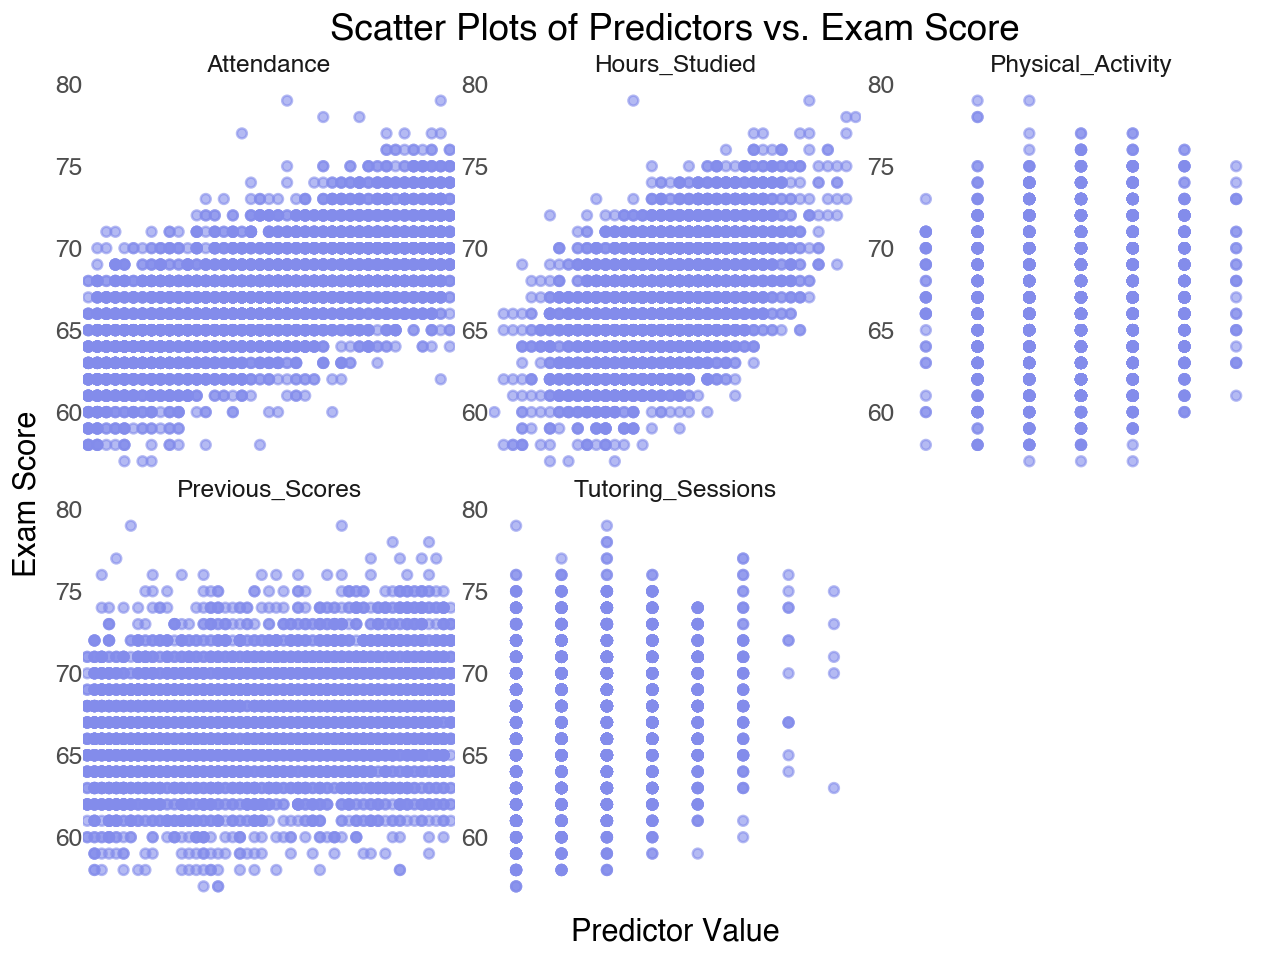

In [54]:
gg = (ggplot(train_long_filtered, aes(x='Value', y='Exam_Score')) +
              geom_point(color=colors['purple'], alpha=0.6) +  # Scatter plot with some transparency
              facet_wrap('~Predictor', nrow=2, scales= 'free') +  # Create a grid layout with 2 rows
              labs(title='Scatter Plots of Predictors vs. Exam Score',
                   x='Predictor Value',
                   y='Exam Score') +
              theme_minimal() +  # Clean minimal theme
              theme(
                  axis_text_x=element_blank(),  
                  panel_grid_major=element_blank(),  
                  panel_grid_minor=element_blank(),  
                  subplots_adjust={'top': 0.9},  
                  panel_spacing = 0.005
              )
)
gg

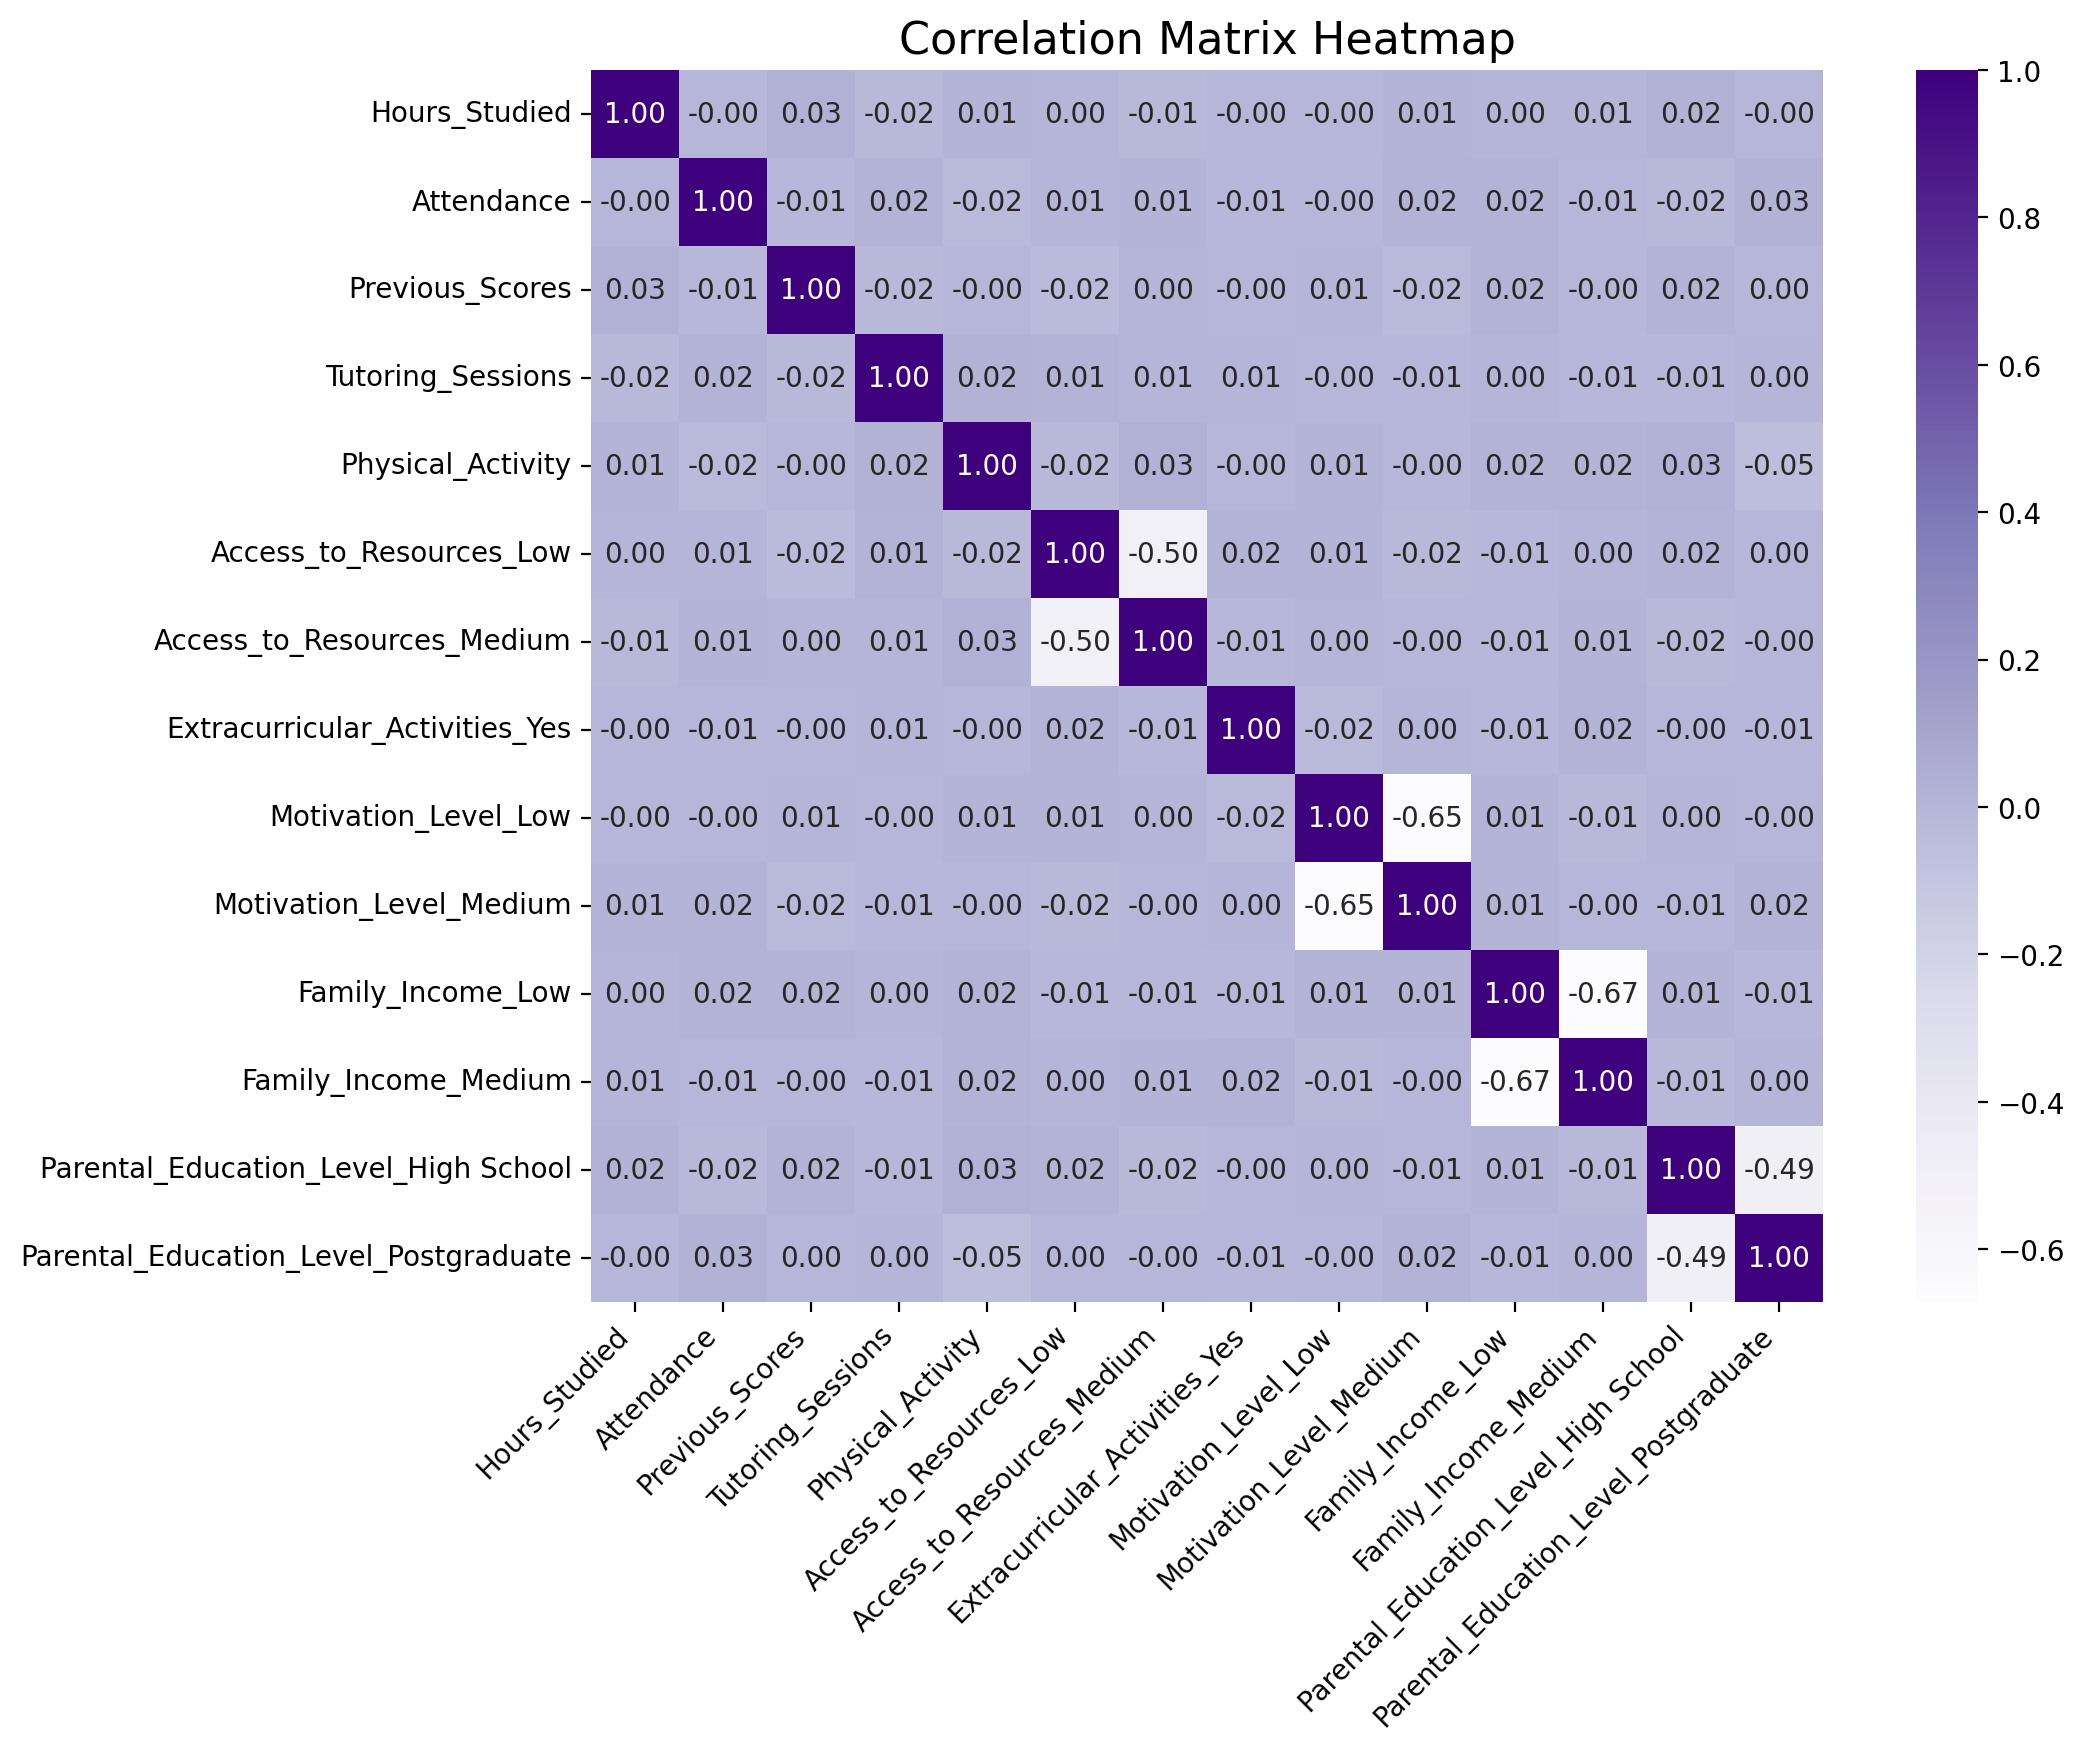

In [55]:
X_encoded = pd.get_dummies(x_lasso_train_low, drop_first=True)
correlation_matrix = X_encoded.corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Purples', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.show()

All of the graphs look good but there are some clear outliers so let's determine how many influential points are in the low score dataset. 

## Influential Points in the Low Score Model

In [56]:
influence = OLSInfluence(lasso_model_low)

leverage = influence.hat_matrix_diag
cooks_distance = influence.cooks_distance[0]
studentized_residuals = influence.resid_studentized_internal

influence_data = pd.DataFrame({
    'Index': np.arange(len(train_low)),
    'Leverage': leverage,
    'Cook\'s Distance': cooks_distance,
    'Studentized Residual': studentized_residuals
})

influence_data_sorted = influence_data.sort_values(by=['Leverage', 'Cook\'s Distance', 'Studentized Residual'], ascending=False)

top_3_influence = influence_data_sorted.head(3)

top_3_influence

Index  Leverage  Cook's Distance  Studentized Residual
5611   5043  0.007464     5.039074e-07             -0.031705
3731     53  0.006856     4.598461e-04             -0.999592
3717   1002  0.006809     5.532396e-04              1.100212

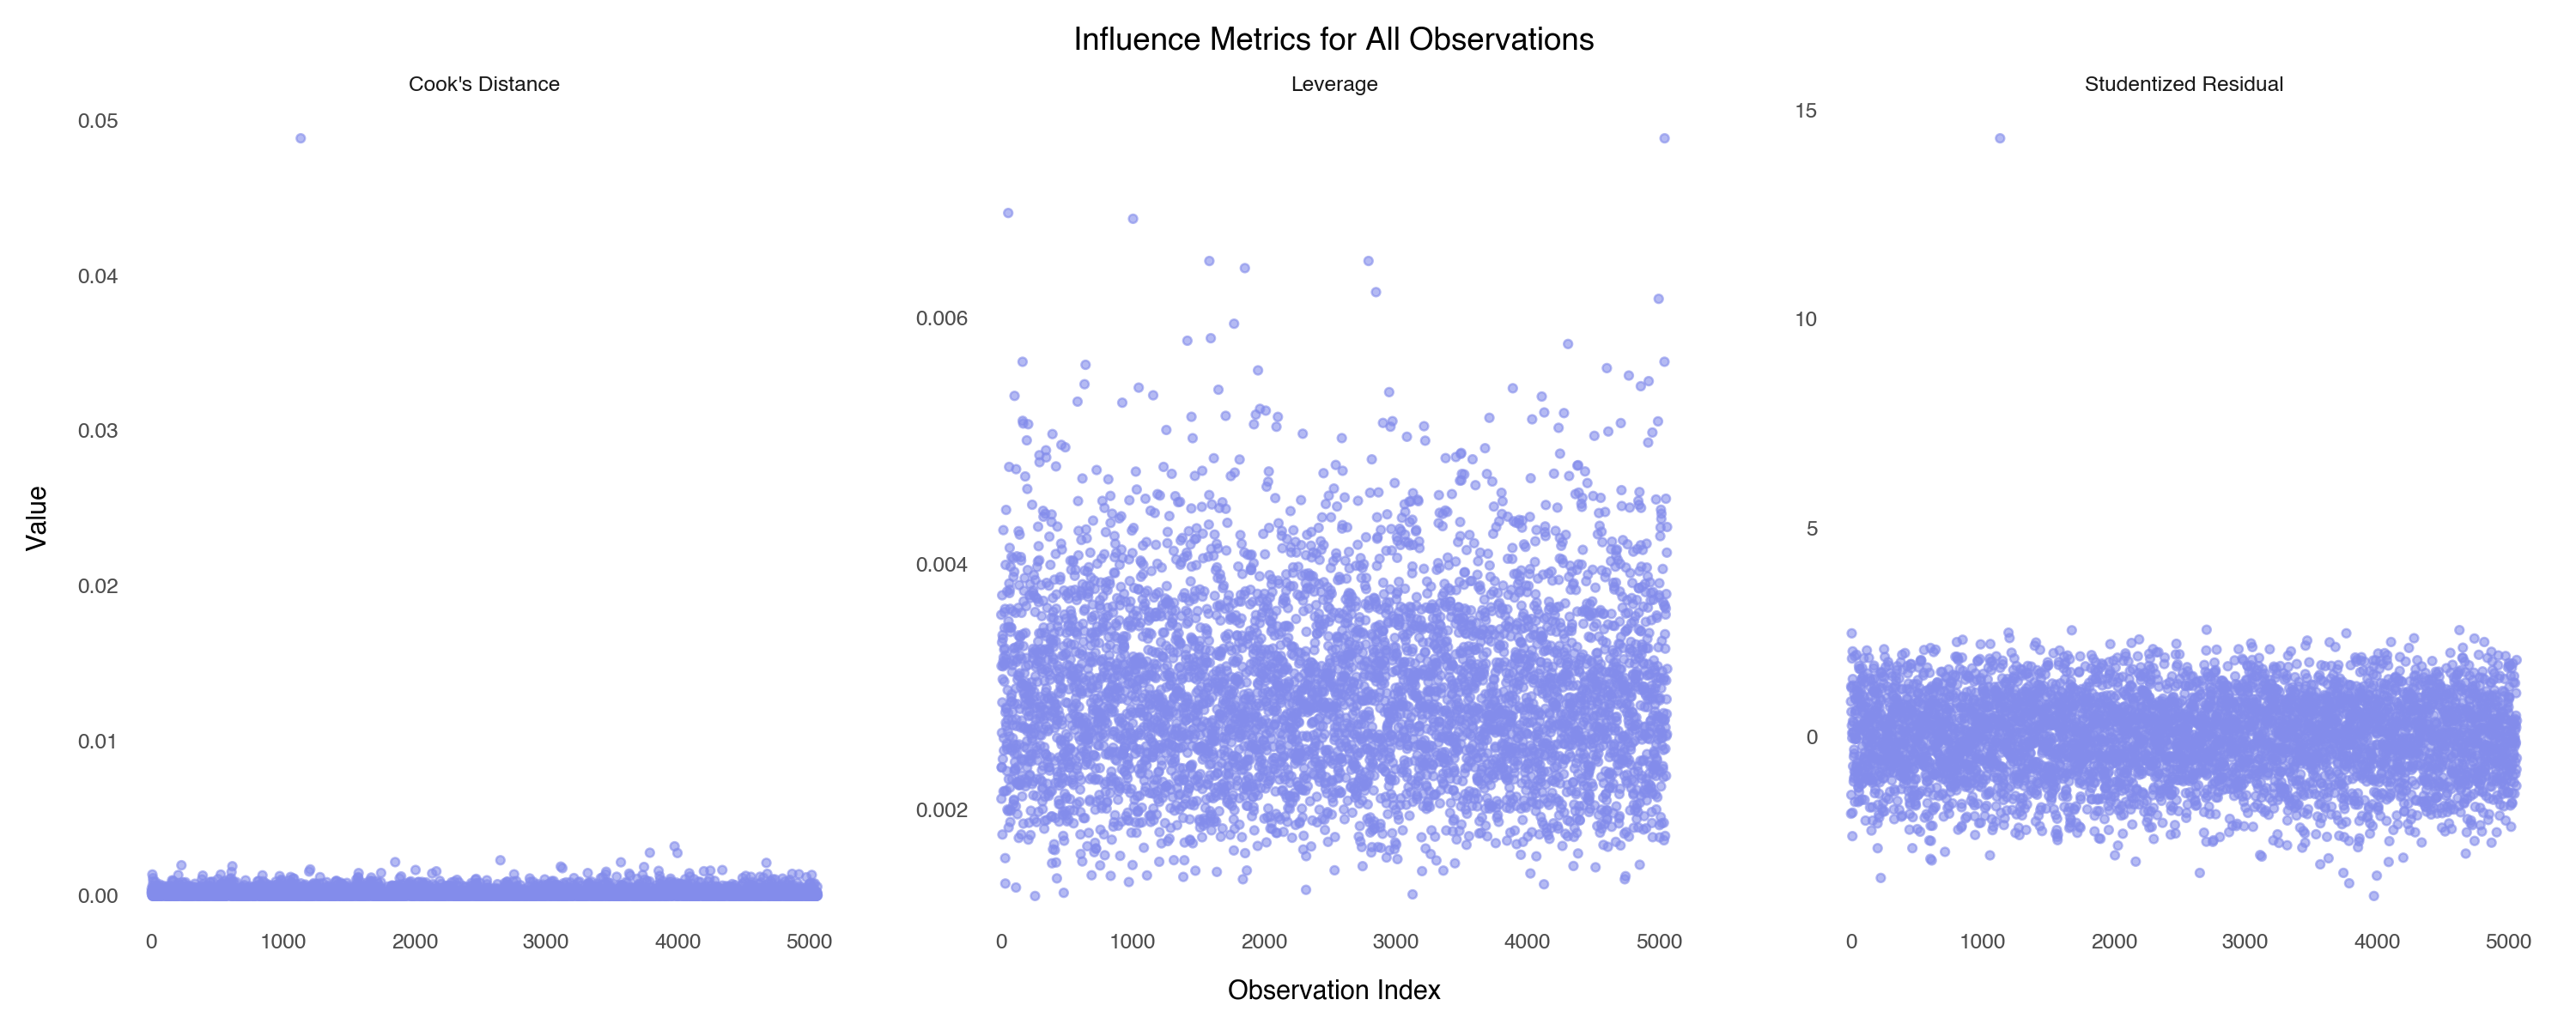

In [57]:
influence_data = pd.DataFrame({
    'Index': np.arange(len(train_low)),
    'Leverage': leverage,
    'Cook\'s Distance': cooks_distance,
    'Studentized Residual': studentized_residuals
})

df_melted = influence_data.melt(id_vars='Index', 
                     value_vars=['Leverage', 'Cook\'s Distance', 'Studentized Residual'], 
                     var_name='Metric', 
                     value_name='Value')

ggplot(df_melted, aes(x='Index', y='Value')) + \
    geom_point(color='#838ceb', alpha=0.6) + \
    facet_wrap('~Metric', scales='free_y', ncol=3) + \
    labs(title='Influence Metrics for All Observations', 
         x='Observation Index', 
         y='Value') + \
    theme_minimal() + \
    theme(
        figure_size=(15, 6),  
        panel_spacing=0.025,
        panel_grid_major=element_blank(),  
        panel_grid_minor=element_blank()  
    )

In [58]:
colors['custom_purples']

['#c2c7f2', '#959cdb', '#838ceb', '#6973db', '#4a54b5']

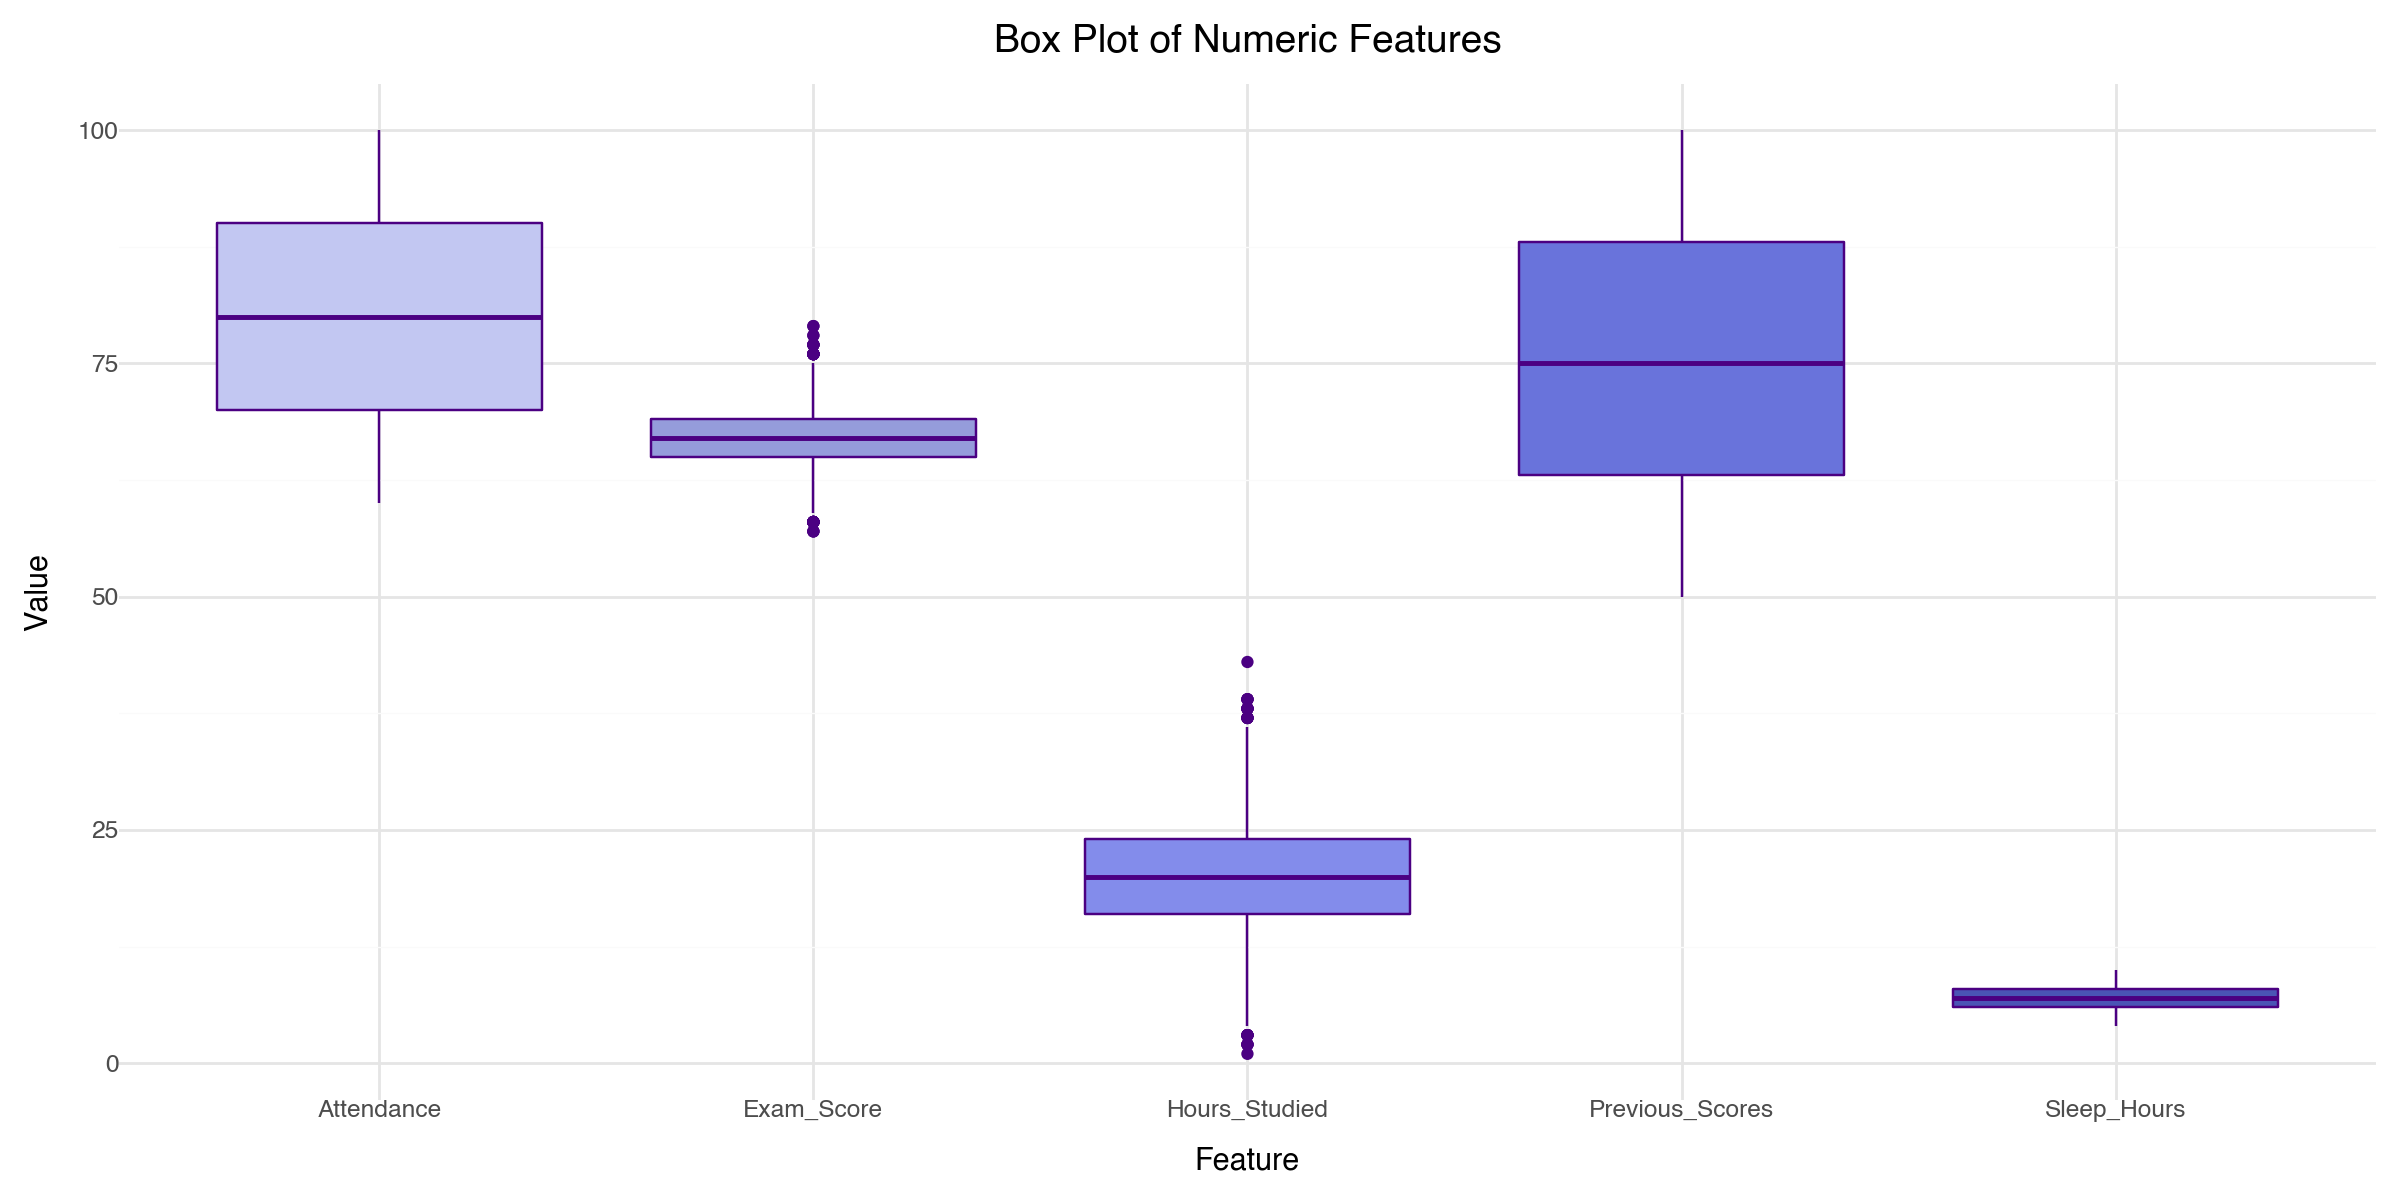

In [59]:
numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']

train_low_melted = train_low[numeric_columns].melt(var_name='Feature', value_name='Value')



# Create the boxplot using plotnine with multiple color shades
ggplot(train_low_melted, aes(x='Feature', y='Value', fill='Feature')) + \
    geom_boxplot(color='#4B0082') + \
    scale_fill_manual(values=colors['custom_purples']) + \
    labs(title='Box Plot of Numeric Features', x='Feature', y='Value') + \
    theme_minimal() + \
    theme(
        figure_size=(12, 6),  
        axis_text_x=element_text(rotation=0, hjust=0.5),  # Ensure horizontal x-axis labels
        plot_title=element_text(size=14, weight='bold'), 
        legend_position='none'  
    )

/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/3930044355.py:28: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/homebrew/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_segment : Removed 5064 rows containing missing values.


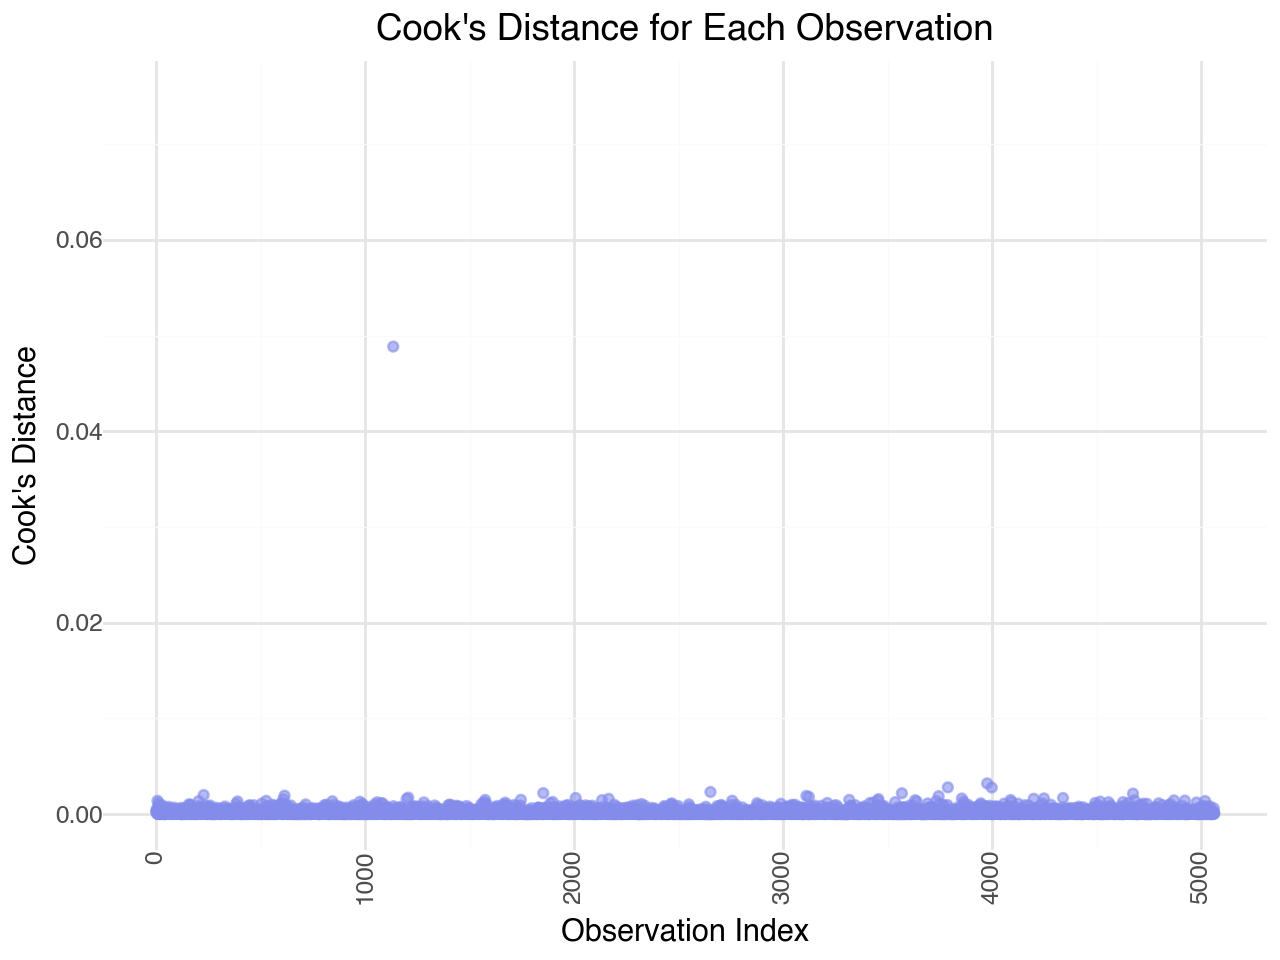

In [60]:
influence1 = OLSInfluence(lasso_model_low)
cooks_d1, _ = influence1.cooks_distance

cooks_distance_df = pd.DataFrame({
    'Observation Index': np.arange(len(cooks_d1)),
    'Cook\'s Distance': cooks_d1
})

abs_residuals_low = np.abs(lasso_model_low.resid)

top_two_outliers_idx = abs_residuals_low.nlargest(2).index
top_two_outliers = train_low.loc[top_two_outliers_idx]

cooks_plot = (ggplot(cooks_distance_df, aes(x='Observation Index', y='Cook\'s Distance')) +
               geom_point(color="#838ceb", alpha=0.6) +  # Scatter plot for Cook's distance
               geom_segment(aes(x=min(cooks_distance_df['Observation Index']),
                                xend=max(cooks_distance_df['Observation Index']),
                                y=0.5, yend=0.5),  # Horizontal line at a threshold, set to 0.5
                            color='#373f8a', linetype='dashed') +  # Add a threshold line (adjust the y value as needed)
               labs(title='Cook\'s Distance for Each Observation',
                    x='Observation Index',
                    y='Cook\'s Distance') +
               scale_y_continuous(limits=(0, 0.075)) +  # Set y-axis limits from 0 to 1
               theme_minimal() +  # Clean theme
               theme(axis_text_x=element_text(rotation=90))  # Rotate x-axis labels for better visibility
              )

print(cooks_plot)

/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/2111622971.py:21: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


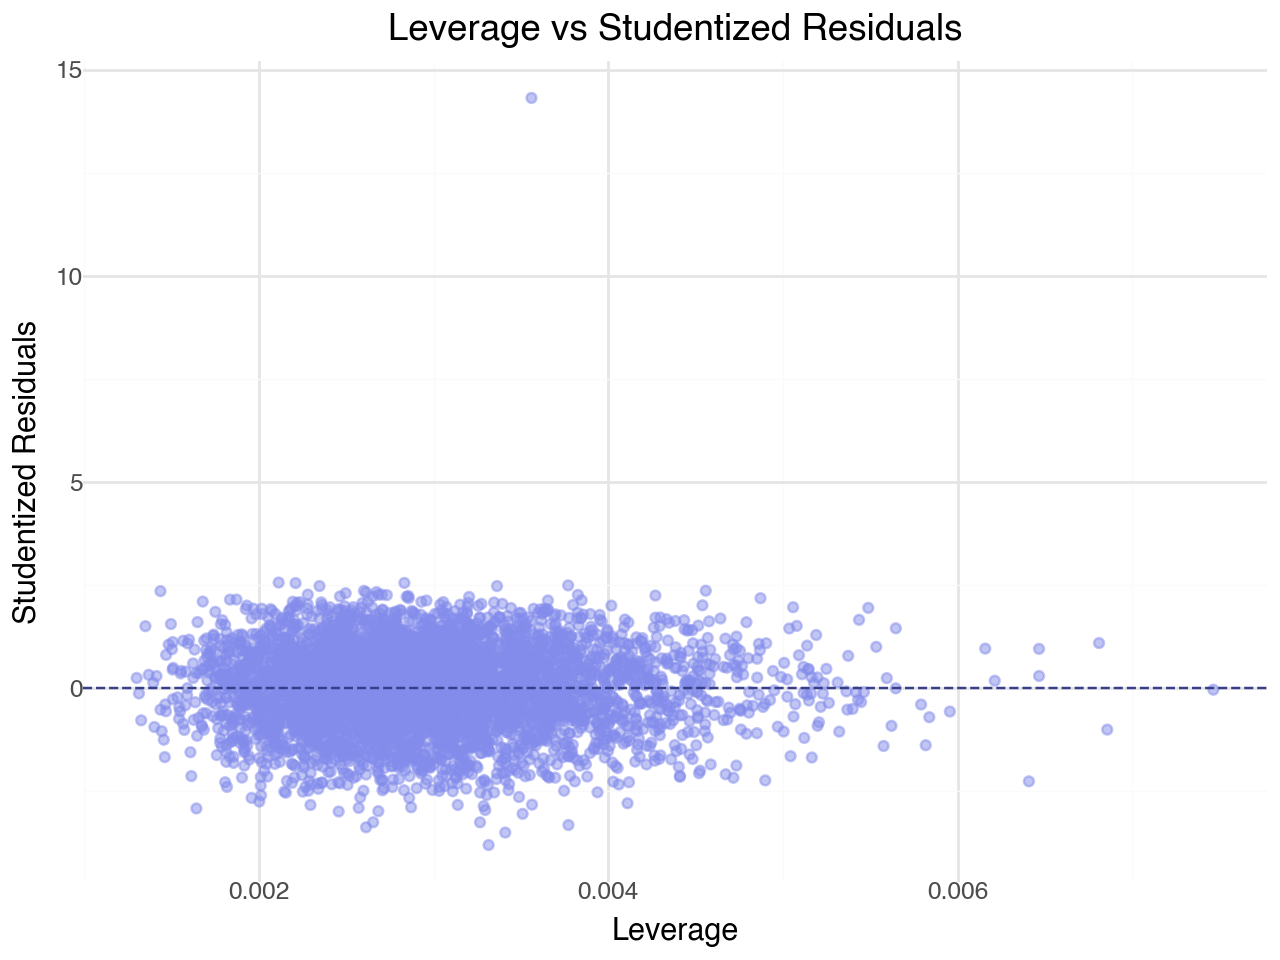

In [61]:
leverage2 = influence.hat_matrix_diag
student_resid2 = influence.resid_studentized_internal

leverage_df = pd.DataFrame({
    'Leverage': leverage2,
    'Studentized Residuals': student_resid2,
    'Outlier': [False] * len(leverage2)  # Create a column to mark outliers
})

# Create the Leverage vs. Studentized Residuals plot using Plotnine
leverage_plot = (ggplot(leverage_df, aes(x='Leverage', y='Studentized Residuals')) +
                 geom_point(color="#838ceb", alpha=0.5) +  # Scatter plot with coloring for outliers
                 geom_hline(yintercept=0, color='#373f8a', linetype='dashed') +  # Horizontal line at y=0
                 labs(title='Leverage vs Studentized Residuals',
                      x='Leverage',
                      y='Studentized Residuals') +  # Custom color for outliers
                 theme_minimal()  # Clean theme
                )

# Display the leverage vs. studentized residuals plot
print(leverage_plot)

/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/815878488.py:17: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


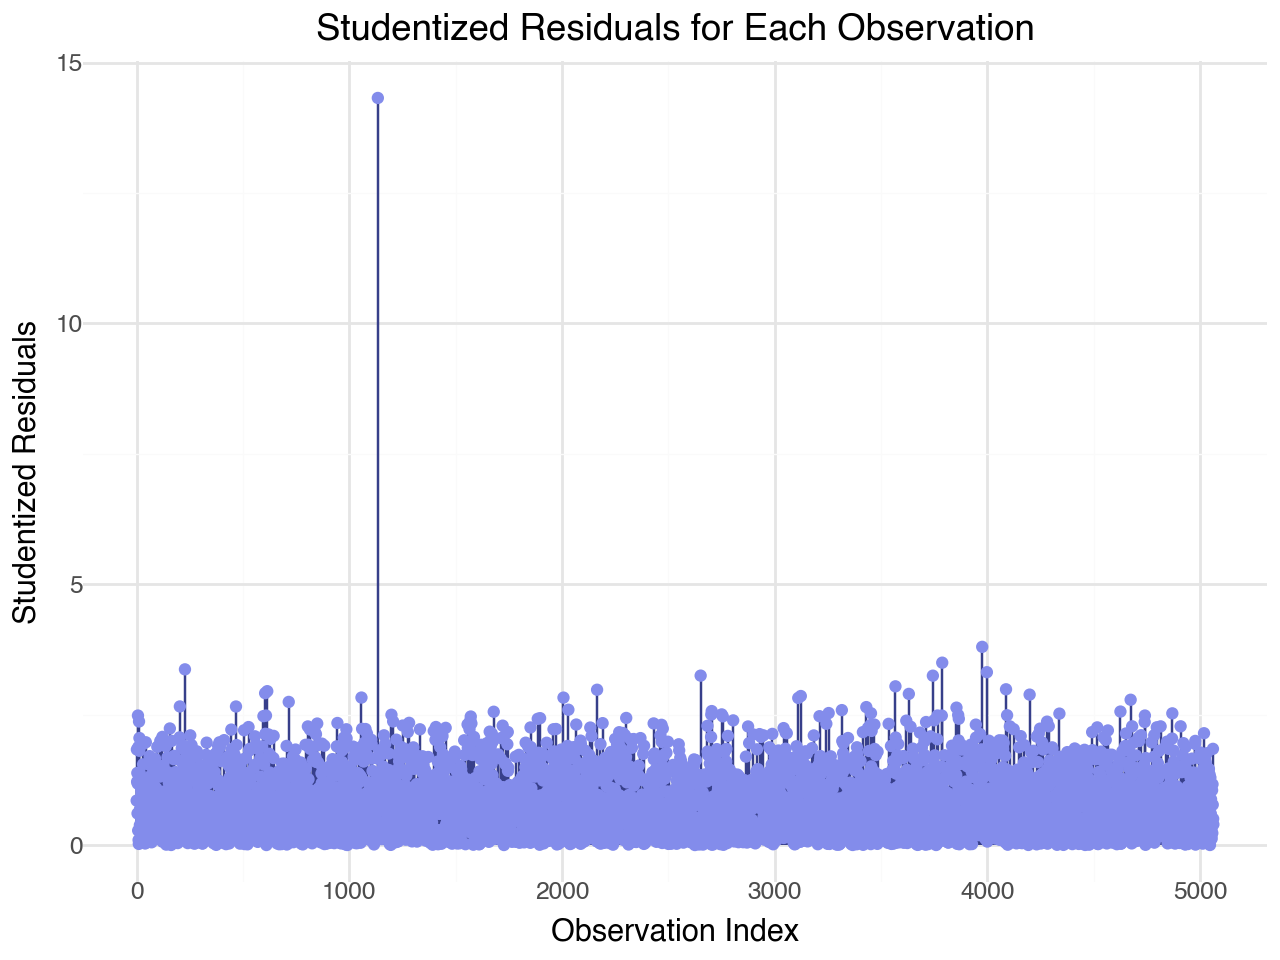


Studentized residual for row 5125: 0.22495500072490618
Studentized residual for row 2542: 0.10633987694030454


In [62]:
student_residuals_df = pd.DataFrame({
    'Observation Index': np.arange(len(student_resid2)),
    'Studentized Residuals': np.abs(student_resid2)
})

student_residuals_plot = (ggplot(student_residuals_df, aes(x='Observation Index', y='Studentized Residuals')) +
                          geom_segment(aes(x='Observation Index', xend='Observation Index', 
                                           y=0, yend='Studentized Residuals'), 
                                       color='#373f8a') +  # Vertical lines
                          geom_point(color="#838ceb") +  # Points for the residuals
                          labs(title='Studentized Residuals for Each Observation',
                               x='Observation Index',
                               y='Studentized Residuals') +
                          theme_minimal()  
                         )

print(student_residuals_plot)

print(f"Studentized residual for row 5125: {student_resid2[5125]}")
print(f"Studentized residual for row 2542: {student_resid2[2542]}")

Even though these points are influential, they don't seem to be significantly impacting the data so we chose not to remove any of the data. 

## Testing the Low Model: 

In [63]:
# Adding a constant to the test set for the intercept term (if required by statsmodels)
X_test = sm.add_constant(X_test_low)

# Use your previously trained model to predict y_test
y_pred = lasso_model_low.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_low, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test_low, y_pred)
r2 = r2_score(y_test_low, y_pred)

# Print the results
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MSE: 1.2658230069319085
RMSE: 1.1250879996390988
MAE: 0.8514178758116681
R-squared: 0.8872329372713124


y_test_low shape: 1266, y_pred shape: 1266


/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/2972994973.py:23: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


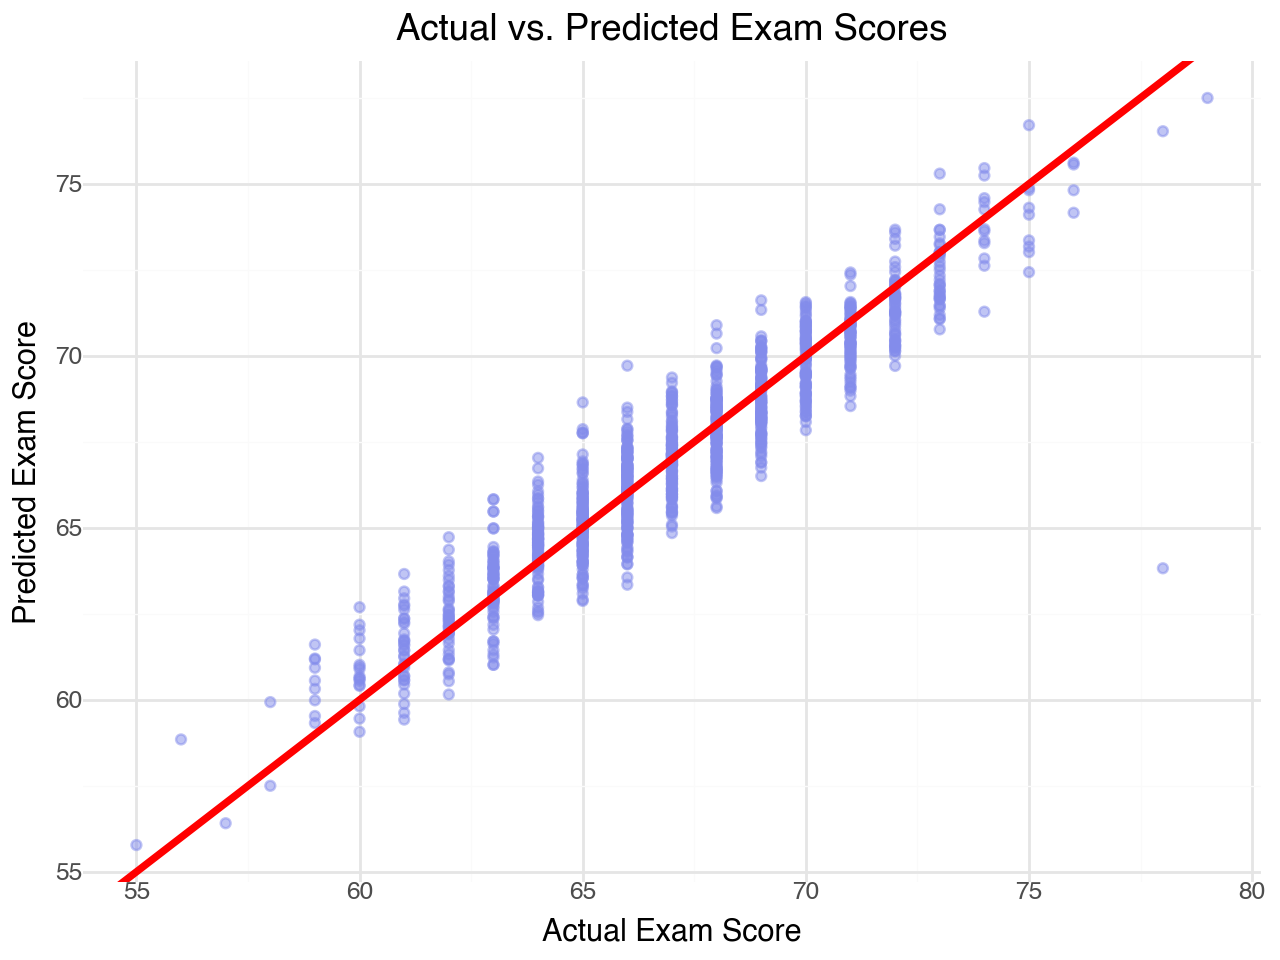

In [64]:
# Check if y_test_low and y_pred have data
print(f"y_test_low shape: {len(y_test_low)}, y_pred shape: {len(y_pred)}")

# Create a DataFrame from y_test_low and y_pred
results = pd.DataFrame({
    'Actual': y_test_low,
    'Predicted': y_pred
})

# Create the scatter plot using Plotnine
gg_plot = (ggplot(results, aes(x='Actual', y='Predicted')) +
            geom_point(alpha=0.5, color=colors['purple']) +  # Scatter plot of actual vs predicted
            geom_abline(intercept=0, slope=1, color=colors['red'], size=1.5) +  # Line of perfect fit
            labs(
                x='Actual Exam Score',
                y='Predicted Exam Score',
                title='Actual vs. Predicted Exam Scores'
            ) +
            theme_minimal()  # Set figure size
           )

# Display the plot
print(gg_plot)

We see that all of the residuals fall in line wiht the line of best fit.

## High Model: 

The scores in the high model are those over 80.

In [65]:
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_train_high),
    ('lasso', Lasso(alpha=0.1))  # You can adjust alpha for regularization
])

# Fit the model to the entire dataset
lasso_pipeline.fit(X_train_high, y_train_high)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['index', 'Hours_Studied', 'Attendance', 'Sleep_Hours',
       'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
       'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Learning_Disabilities', 'Parental_Education_Level', 'Gender'],
      dtype='object'))])),
                ('lasso', Lasso(alpha=0.1))])

In [66]:
encoded_categorical_names = lasso_pipeline.named_steps['preprocessor'] \
    .transformers_[1][1].get_feature_names_out(categorical_cols3)

all_feature_names = list(numerical_cols3) + list(encoded_categorical_names)

lasso_coefficients = lasso_pipeline.named_steps['lasso'].coef_

selected_features = [name for name, coef in zip(all_feature_names, lasso_coefficients) if coef != 0]

print(f'Selected predictors: {selected_features}')

Selected predictors: ['index', 'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Access_to_Resources_Low', 'Access_to_Resources_Medium', 'Internet_Access_Yes', 'Family_Income_Low', 'Family_Income_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'School_Type_Public', 'Parental_Education_Level_High School', 'Parental_Education_Level_Postgraduate', 'Gender_Male']


In [67]:
x_lasso_train = X_train_high.drop(columns=['Sleep_Hours', 
                      'Internet_Access', 
                      'Teacher_Quality', 'School_Type', 'Learning_Disabilities', 
                       'Gender'])
y_lasso_train = y_train_high
formula = 'Exam_Score ~ ' + ' + '.join(x_lasso_train.columns)

In [68]:
lasso_model_high = smf.ols(formula= formula, data = train_high).fit()
lasso_model_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     4.729
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           0.000541
Time:                        17:43:10   Log-Likelihood:                -98.786
No. Observations:                  38   AIC:                             229.6
Df Residuals:                      22   BIC:                             255.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   55.2502      7.693      7.182      0.000      39.297      71.204
Access_to_Resources[T.Low]                  -5.9154      2.174     -2.721      0.012     -10.424      -1.406
Access_to_Resources[T.Medium]                1.5259      2.036      0.750      0.461      -2.696       5.748
Extracurricular_Activities[T.Yes]            0.5042      1.880      0.268      0.791      -3.395       4.404
Motivation_Level[T.Low]                     -0.6894      2.340     -0.295      0.771      -5.542       4.164
Motivation_Level[T.Medium]                  -0.7110      2.009     -0.354      0.727      -4.877       3.455
Family_Income[T.Low]                        -1.0255      2.239     -0.458      0.651      -5.668       3.617
Family_Income[T.Medium]                      1.8780      2.336      0.804      0.430      -2.966       6.722
Parental_Education_Level[T.High School]      2.1240      1.850      1.148      0.263      -1.713       5.961
Parental_Education_Level[T.Postgraduate]     1.7968      2.455      0.732      0.472      -3.295       6.889
index                                    -2.144e-05      0.000     -0.044      0.965      -0.001       0.001
Hours_Studied                                0.0369      0.135      0.273      0.787      -0.244       0.317
Attendance                                   0.2635      0.083      3.179      0.004       0.092       0.435
Previous_Scores                              0.1685      0.052      3.271      0.003       0.062       0.275
Tutoring_Sessions                           -0.1593      0.708     -0.225      0.824      -1.628       1.309
Physical_Activity                           -0.1248      0.756     -0.165      0.870      -1.693       1.443
==============================================================================
Omnibus:                        1.434   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                1.096
Skew:                           0.413   Prob(JB):                        0.578
Kurtosis:                       2.894   Cond. No.                     3.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/2767330584.py:15: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


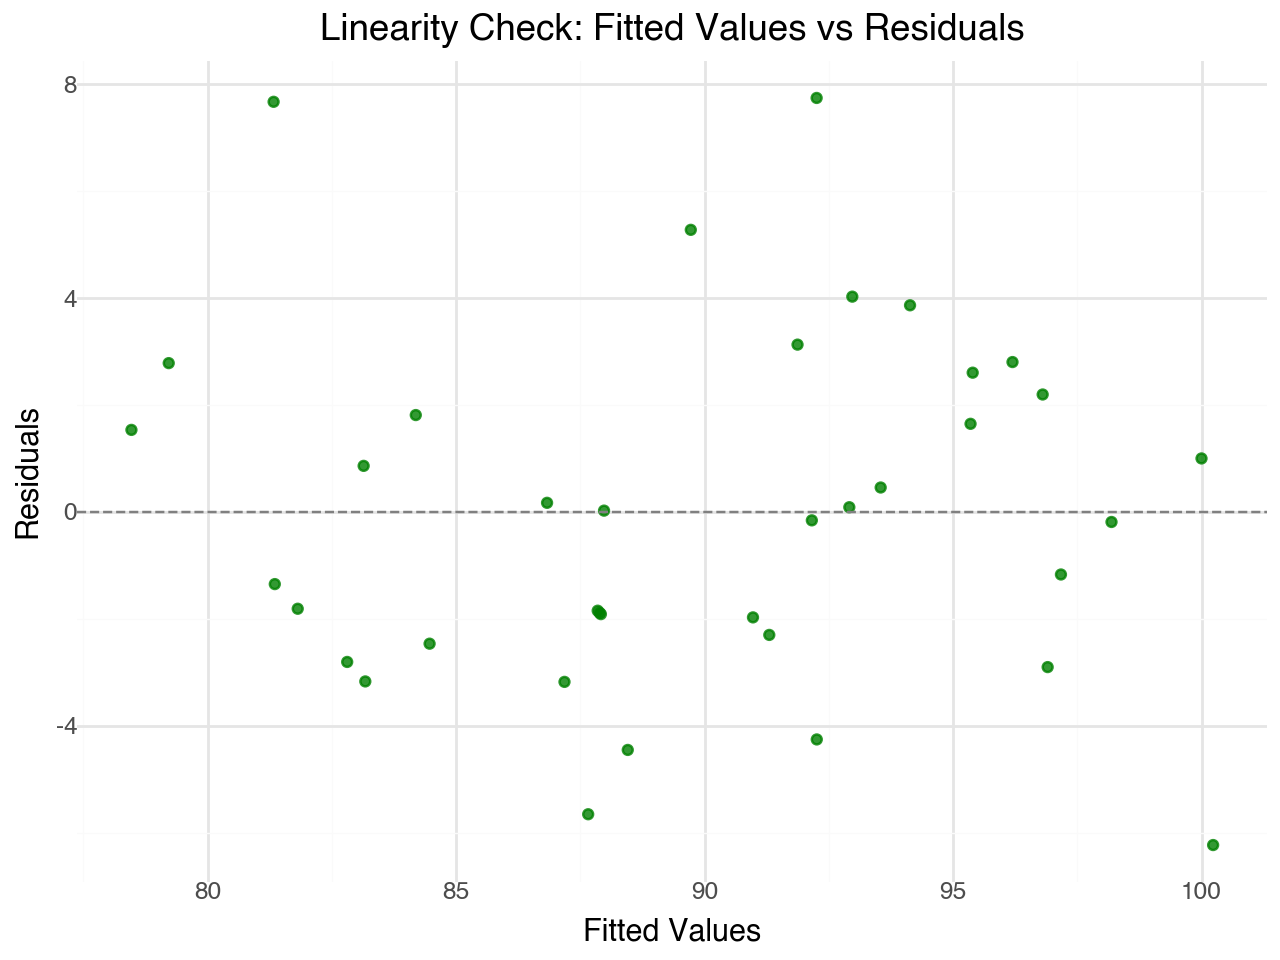

In [69]:
df = pd.DataFrame({
    'Fitted Values': lasso_model_high.fittedvalues,
    'Residuals': lasso_model_high.resid
})

gg = (ggplot(df, aes(x='Fitted Values', y='Residuals')) +
      geom_point(color='green', alpha=0.8) +  # Scatter plot
      geom_hline(yintercept=0, linetype='dashed', color='gray') +  # Horizontal line at y=0
      labs(title='Linearity Check: Fitted Values vs Residuals',
           x='Fitted Values',
           y='Residuals') +
      theme_minimal()  # Clean minimal theme
)

print(gg)

/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/3077312418.py:14: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


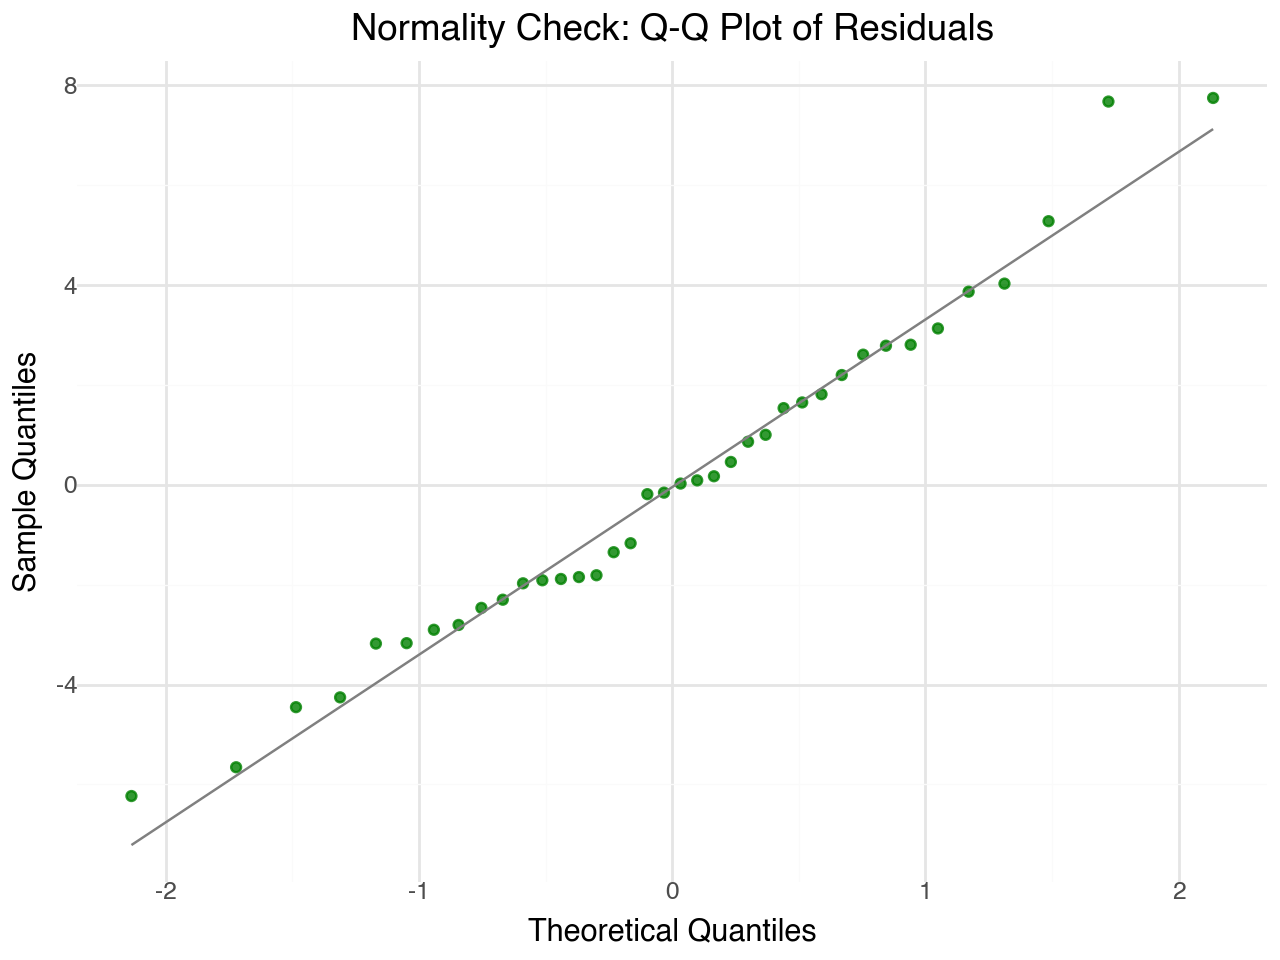

In [70]:
df_resid = pd.DataFrame({
    'Residuals': lasso_model_high.resid
})

gg_qq = (ggplot(df_resid, aes(sample='Residuals')) +
         stat_qq(color='green', alpha=0.8) +  # Q-Q points
         stat_qq_line(color='grey') +  # Line representing normal distribution
         labs(title='Normality Check: Q-Q Plot of Residuals',
              x='Theoretical Quantiles',
              y='Sample Quantiles') +
         theme_minimal()  # Clean minimal theme
)

print(gg_qq)

In [71]:
predictors_to_drop = ['Access_to_Resources', 'Extracurricular_Activities', 
                       'Family_Income', 'Motivation_Level', 'Parental_Education_Level']

train_high_long = train_high.melt(id_vars='Exam_Score', value_vars=x_lasso_train.columns, 
                          var_name='Predictor', value_name='Value')

train_high_long_filtered = train_high_long[~train_high_long['Predictor'].isin(predictors_to_drop)]


/var/folders/bn/8l9zg4092yg1r262fl2zn9nw0000gn/T/ipykernel_2479/1629869834.py:17: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/homebrew/anaconda3/lib/python3.12/site-packages/plotnine/themes/themeable.py:2419: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


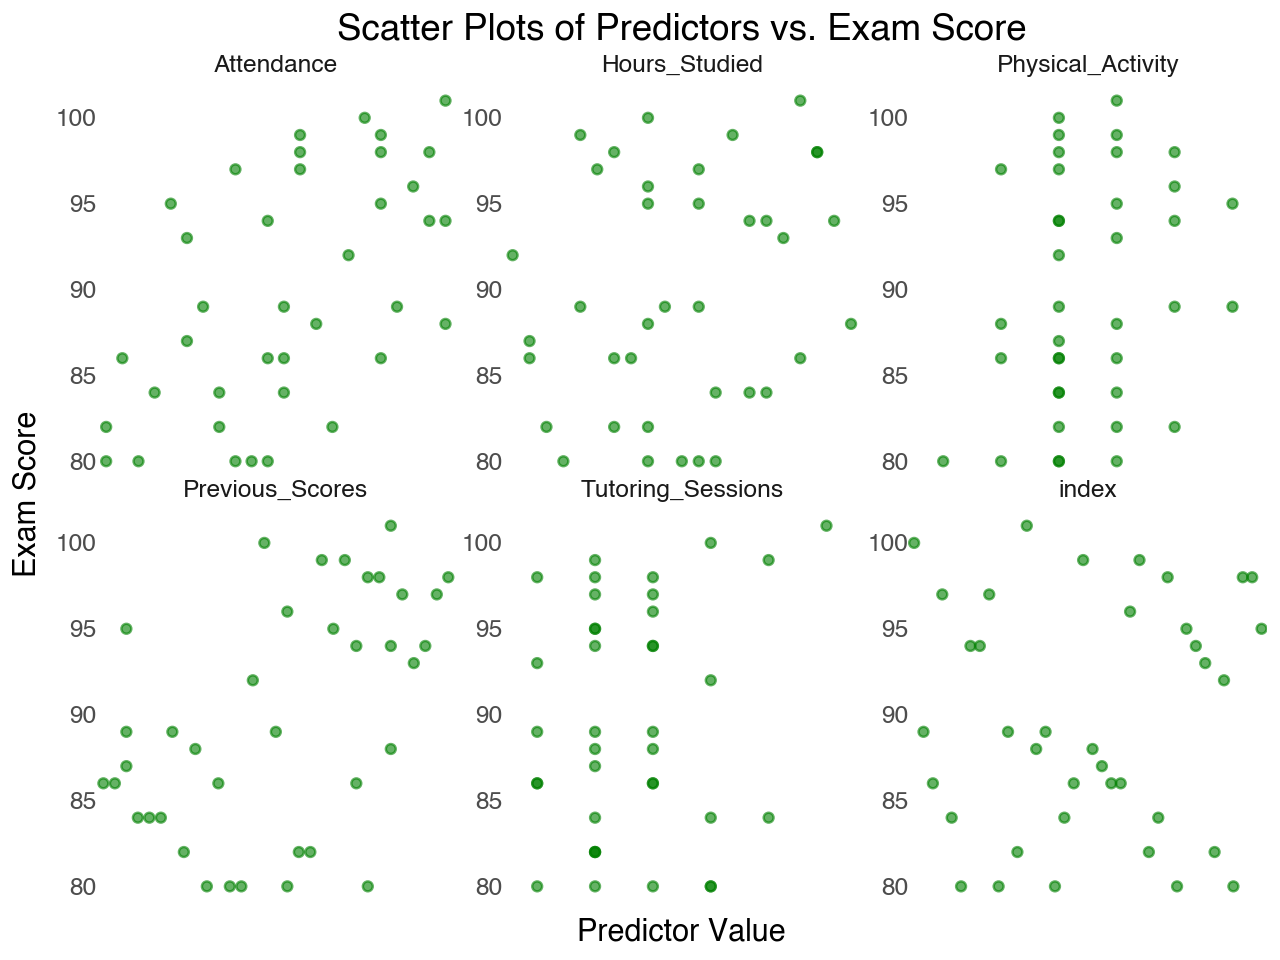

In [72]:
gg_scatter = (ggplot(train_high_long_filtered, aes(x='Value', y='Exam_Score')) +
              geom_point(color='green', alpha=0.6) +  # Scatter plot with some transparency
              facet_wrap('~Predictor', nrow=2, scales= 'free') +  # Create a grid layout with 2 rows
              labs(title='Scatter Plots of Predictors vs. Exam Score',
                   x='Predictor Value',
                   y='Exam Score') +
              theme_minimal() +  # Clean minimal theme
              theme(
                  axis_text_x=element_blank(),  
                  panel_grid_major=element_blank(),  
                  panel_grid_minor=element_blank(),  
                  subplots_adjust={'top': 0.9},  
                  panel_spacing = 0.005
              )
)

print(gg_scatter)

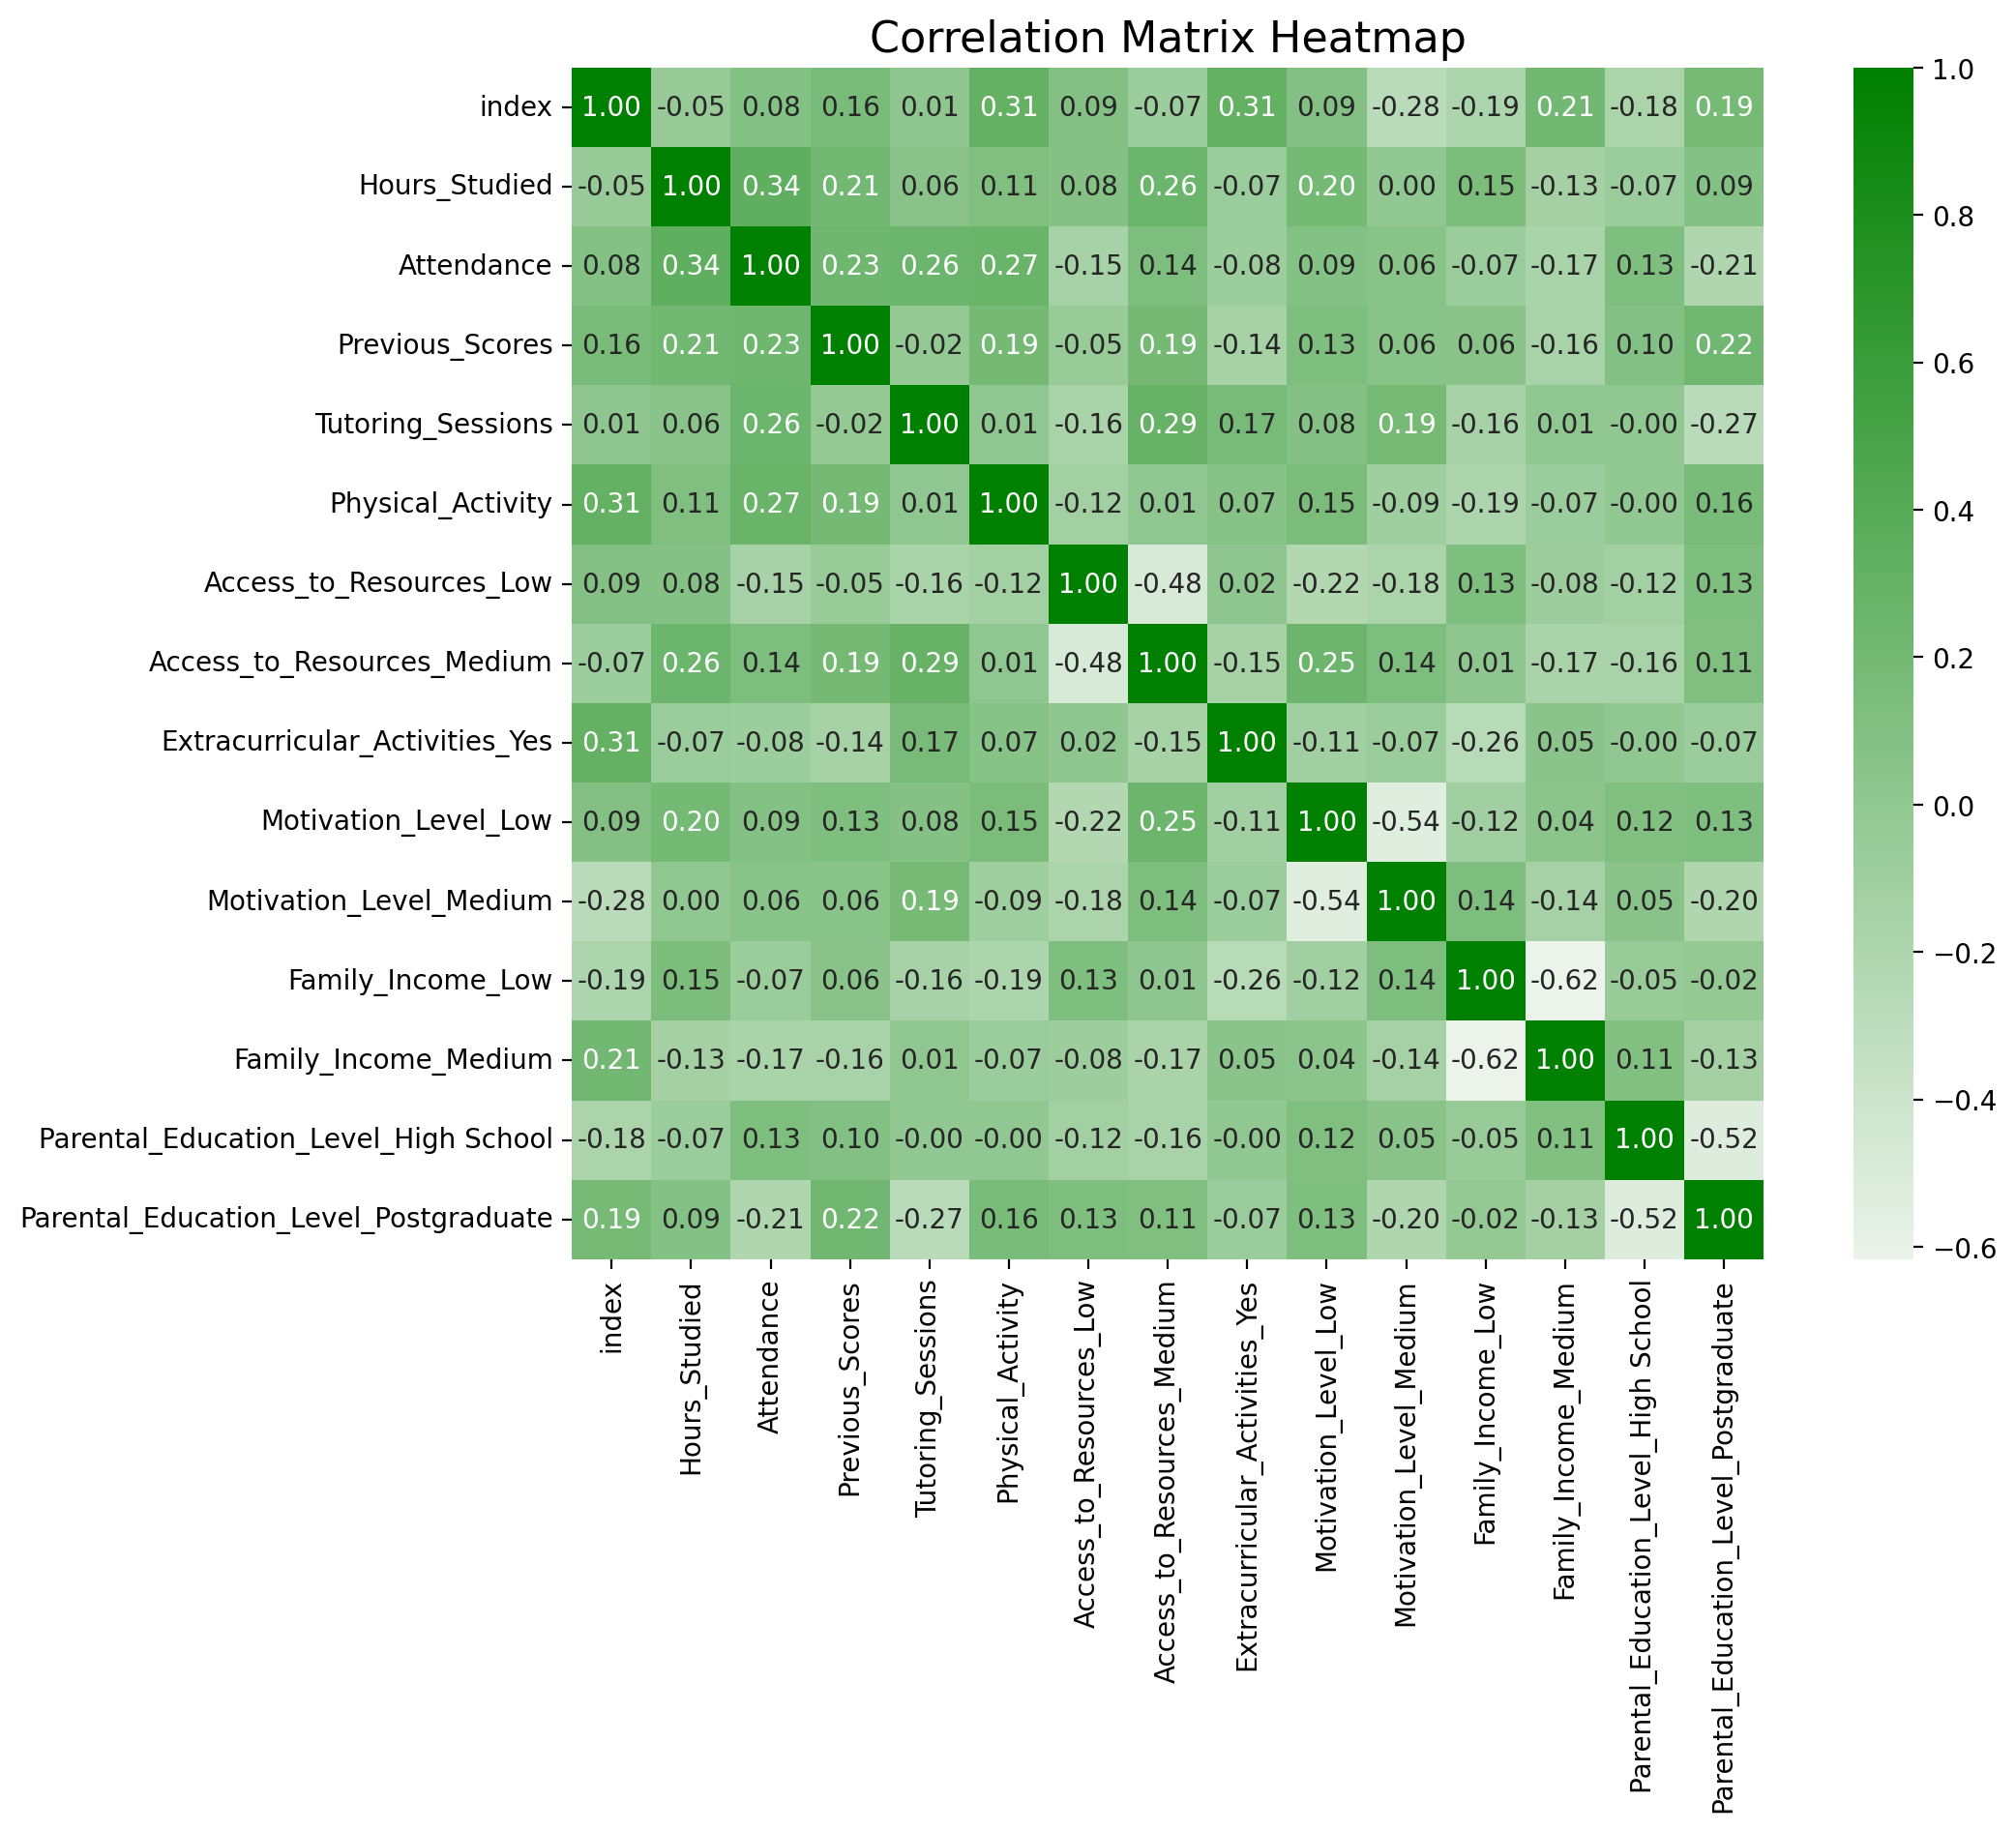

In [73]:
non_numeric_cols = x_lasso_train.select_dtypes(exclude='number').columns

X_encoded = pd.get_dummies(x_lasso_train, drop_first=True)

correlation_matrix = X_encoded.corr()

plt.figure(figsize=(12, 8))
Greens = sns.light_palette("green", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=Greens, square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [74]:
X_test_2 = sm.add_constant(X_test_high)

y_pred = lasso_model_high.predict(X_test_2)

mse = mean_squared_error(y_test_high, y_pred)
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test_high, y_pred)
r2 = r2_score(y_test_high, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MSE: 30.452231420557375
RMSE: 5.518354049946177
MAE: 3.9977803827264267
R-squared: -0.3619065930481833


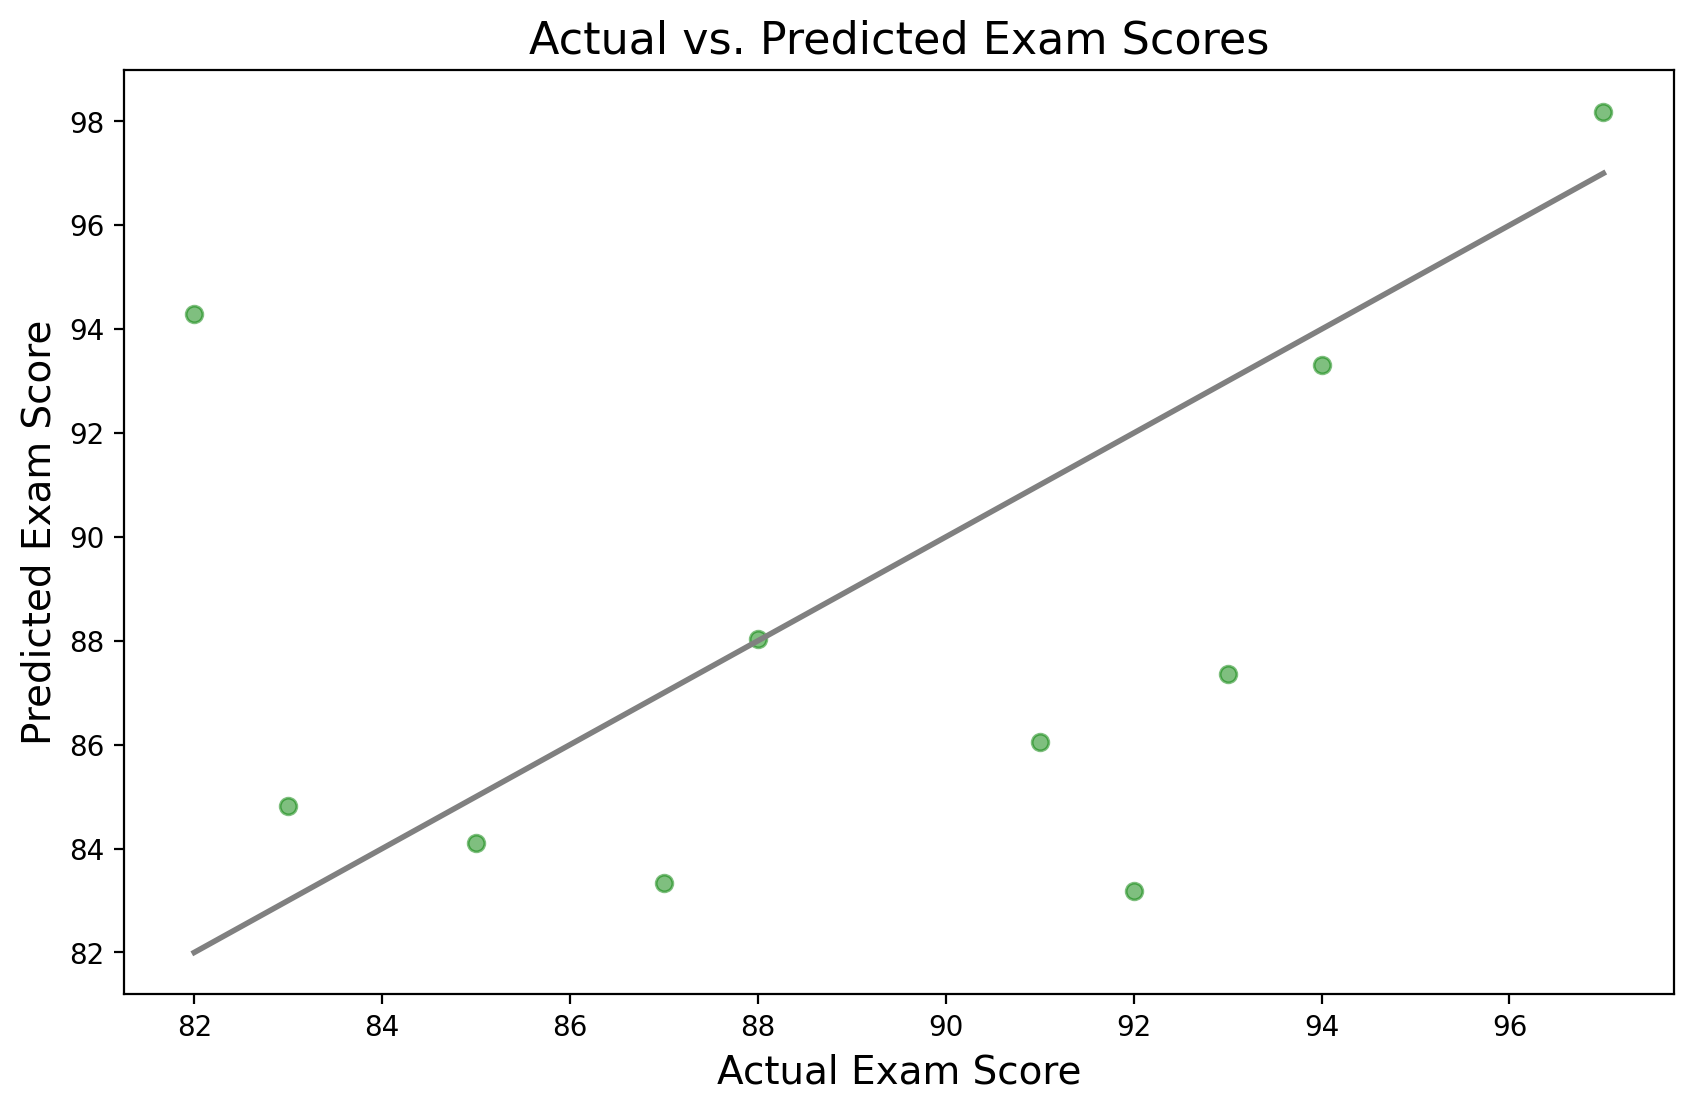

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_high, y_pred, alpha=0.5, color='green')  # Scatter plot of actual vs predicted
plt.plot([min(y_test_high), max(y_test_high)], [min(y_test_high), max(y_test_high)], color='gray', lw=2)  # Line of perfect fit
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()